# Load the Package

In [1]:
# Import packages.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msn
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")
import os
import matplotlib.ticker as mtick

In [2]:
os.getcwd()

'C:\\Users\\singh\\OneDrive\\Desktop\\Data Scientist\\PROJECTS\\MACHINE LEARNING\\DATA SCIENCE SALARY PREDICTION'

In [3]:
pd.set_option("Display.max_columns", None)

In [4]:
%%time 
df = pd.read_csv("data_science_salary.csv")
print("Dataset has been loaded")

Dataset has been loaded
Wall time: 326 ms


In [5]:
df.shape

(956, 15)

In [6]:
print("Number of Rows in the dataset are:", df.shape[0],'\n',
      "Number of Columns in the dataset are:", df.shape[1], sep = ' ')

Number of Rows in the dataset are: 956 
 Number of Columns in the dataset are: 15


In [7]:
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


In [8]:
%%time 
df = pd.read_csv("data_science_salary.csv", index_col = 0)
print("Dataset has been loaded")

Dataset has been loaded
Wall time: 150 ms


In [9]:
df.shape

(956, 14)

In [10]:
print("Number of Rows in the dataset are:", df.shape[0],'\n',
      "Number of Columns in the dataset are:", df.shape[1], sep = ' ')

Number of Rows in the dataset are: 956 
 Number of Columns in the dataset are: 14


In [11]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


In [12]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors'],
      dtype='object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 956 entries, 0 to 955
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          956 non-null    object 
 1   Salary Estimate    956 non-null    object 
 2   Job Description    956 non-null    object 
 3   Rating             956 non-null    float64
 4   Company Name       956 non-null    object 
 5   Location           956 non-null    object 
 6   Headquarters       956 non-null    object 
 7   Size               956 non-null    object 
 8   Founded            956 non-null    int64  
 9   Type of ownership  956 non-null    object 
 10  Industry           956 non-null    object 
 11  Sector             956 non-null    object 
 12  Revenue            956 non-null    object 
 13  Competitors        956 non-null    object 
dtypes: float64(1), int64(1), object(12)
memory usage: 112.0+ KB


In [14]:
df.dtypes

Job Title             object
Salary Estimate       object
Job Description       object
Rating               float64
Company Name          object
Location              object
Headquarters          object
Size                  object
Founded                int64
Type of ownership     object
Industry              object
Sector                object
Revenue               object
Competitors           object
dtype: object

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,956.0,3.601255,1.067619,-1.0,3.3,3.8,4.2,5.0
Founded,956.0,1774.605649,598.942517,-1.0,1937.0,1992.0,2008.0,2019.0


In [16]:
df.describe(include = "object").T

,count,unique,top,freq
Job Title,956,328,Data Scientist,178
Salary Estimate,956,417,-1,214
Job Description,956,596,Data Engineer with R\n\n-Contract Role in Atla...,4
Company Name,956,448,Novartis\n3.8,14
Location,956,237,"New York, NY",78
Headquarters,956,235,"New York, NY",75
Size,956,9,1001 to 5000 employees,177
Type of ownership,956,13,Company - Private,532
Industry,956,63,Biotech & Pharmaceuticals,148
Sector,956,25,Information Technology,239


In [17]:
df.isnull().sum().sum()

0

In [18]:
df.isnull().sum()

Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         0
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
dtype: int64

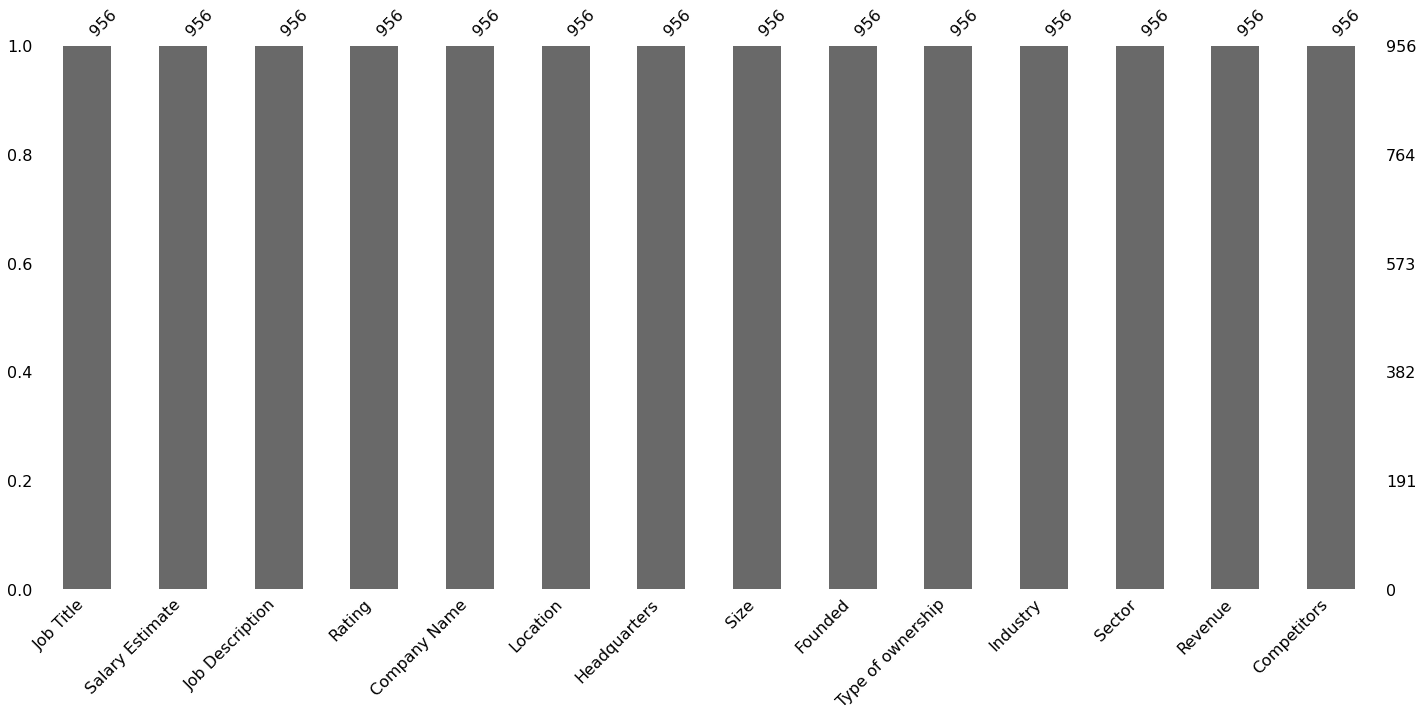

In [19]:
msn.bar(df)

# Univariate Analysis

In [20]:
df = df.rename(columns = {'Job Title':"Job_title",
                          "Salary Estimate" : "Salary_Estimate",
                          "Job Description" : "Job_Description",
                          'Company Name' : 'Company_Name',
                          'Type of ownership' : 'Type_of_ownership'
                         })
df.columns

Index(['Job_title', 'Salary_Estimate', 'Job_Description', 'Rating',
       'Company_Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type_of_ownership', 'Industry', 'Sector', 'Revenue', 'Competitors'],
      dtype='object')

Job Title

In [21]:
len(df['Job_title'].unique())

328

In [22]:
df.Job_title.value_counts()

Data Scientist                                       178
Data Engineer                                         68
Senior Data Scientist                                 42
Data Analyst                                          18
Senior Data Engineer                                  17
                                                    ... 
SQL Data Engineer                                      1
Scientist, Biomarker Science                           1
Data Analyst Level III                                 1
Principal Data Engineer, Data Platform & Insights      1
Data Analyst 2 (Missionary Department)                 1
Name: Job_title, Length: 328, dtype: int64

In [23]:
df.Job_title.value_counts().nlargest(20)

Data Scientist                                178
Data Engineer                                  68
Senior Data Scientist                          42
Data Analyst                                   18
Senior Data Engineer                           17
Business Intelligence Analyst                  13
Senior Data Analyst                            12
Lead Data Scientist                             8
Data Science Manager                            7
Machine Learning Engineer                       6
Principal Data Scientist                        6
Marketing Data Analyst                          6
Sr. Data Engineer                               6
Analytics Manager                               5
Lead Data Engineer                              5
Analytics Manager - Data Mart                   4
Senior Research Scientist-Machine Learning      4
Big Data Engineer                               4
Data Engineer with R                            4
Data Engineer 5 - Contract                      4


In [24]:
df.Job_title.unique()

array(['Data Scientist', 'Healthcare Data Scientist',
       'Research Scientist', 'Staff Data Scientist - Technology',
       'Data Analyst', 'Data Engineer I', 'Scientist I/II, Biology',
       'Customer Data Scientist',
       'Data Scientist - Health Data Analytics',
       'Senior Data Scientist / Machine Learning',
       'Data Scientist - Quantitative', 'Digital Health Data Scientist',
       'Associate Data Analyst', 'Clinical Data Scientist',
       'Data Scientist / Machine Learning Expert', 'Web Data Analyst',
       'Senior Data Scientist', 'Data Engineer',
       'Data Scientist - Algorithms & Inference', 'Scientist',
       'Data Science Analyst', 'Lead Data Scientist',
       'Spectral Scientist/Engineer',
       'College Hire - Data Scientist - Open to December 2019 Graduates',
       'Data Scientist, Office of Data Science',
       'Business Intelligence Analyst', 'Senior Risk Data Scientist',
       'Data Scientist in Artificial Intelligence Early Career',
       'Dat

In [260]:
df_salary = pd.DataFrame.copy(df)
df_salary.head()

,Job_title,Rating,Founded,Type_of_ownership,Sector,Revenue,Competitors,Python_Job,Excel_Job,SQL_Job,Tableau_Job,Job_available,Company_Size,Salary_Estimate
0,2,3.8,1973.0,5,0,6,0,1,1,0,1,0,4,72.0
1,2,3.4,1984.0,4,5,10,0,1,0,0,0,1,7,87.5
2,2,4.8,2010.0,5,2,7,0,1,1,1,0,1,4,85.0
3,2,3.8,1965.0,1,9,8,3,1,0,0,0,1,5,76.5
4,2,2.9,1998.0,5,2,0,3,1,1,1,0,1,2,114.5


In [26]:
def job_title(designation):
    if 'data scientist' in designation.lower() or 'scientist' in designation.lower():
        return 'Data Scientist'
    elif 'data engineer' in designation.lower():
        return 'Data Engineer'
    elif 'data analyst' in designation.lower():
        return 'Data Analyst'
    elif 'machine learning' in designation.lower():
        return 'Machine Learning'
    elif 'manager' in designation.lower():
        return 'Manager'
    elif 'director' in designation.lower():
        return 'Director'
    else:
        return 'Other'

df['Job_title'] = df['Job_title'].apply(job_title)
df['Job_title'].value_counts()

Data Scientist      560
Data Engineer       158
Data Analyst        105
Other                72
Manager              35
Director             13
Machine Learning     13
Name: Job_title, dtype: int64

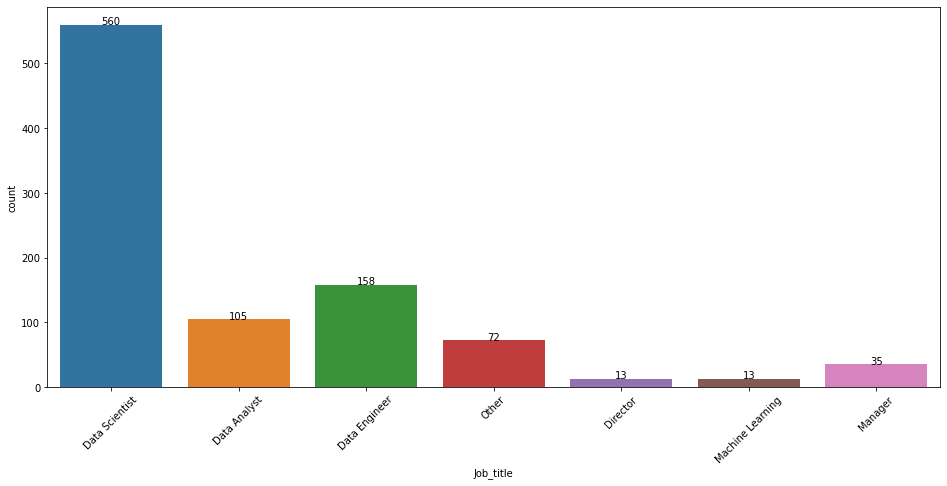

In [27]:
fig, ax1 = plt.subplots(figsize=(16, 7))
graph = sns.countplot(ax = ax1,x = 'Job_title', data = df)
graph.set_xticklabels(graph.get_xticklabels(),rotation = 45)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x() + p.get_width()/2., height + 0.1,height ,ha="center")

Salary Estimate

In [28]:
df['Salary_Estimate'].dtype

dtype('O')

In [29]:
len(df['Salary_Estimate'].unique())

417

In [30]:
df['Salary_Estimate'].value_counts().nlargest(20)

-1                                  214
$86K-$143K (Glassdoor est.)           6
$21-$34 Per Hour(Glassdoor est.)      6
$54K-$115K (Glassdoor est.)           6
$49K-$113K (Glassdoor est.)           6
$76K-$142K (Glassdoor est.)           5
$81K-$167K (Glassdoor est.)           5
$74K-$124K (Glassdoor est.)           5
$107K-$173K (Glassdoor est.)          5
$39K-$66K (Glassdoor est.)            4
$56K-$97K (Glassdoor est.)            4
$68K-$139K (Glassdoor est.)           4
$110K-$175K (Glassdoor est.)          4
$44K-$78K (Glassdoor est.)            4
$82K-$132K (Glassdoor est.)           4
$63K-$105K (Glassdoor est.)           4
$18-$25 Per Hour(Glassdoor est.)      4
$42K-$86K (Glassdoor est.)            4
$108K-$171K (Glassdoor est.)          4
$69K-$127K (Glassdoor est.)           4
Name: Salary_Estimate, dtype: int64

In [31]:
df['Salary_Estimate'] = df['Salary_Estimate'].str.replace('[$, K, (Glassdoorest.)]', "")
df['Salary_Estimate']

0       53-91
1      63-112
2       80-90
3       56-97
4      86-143
        ...  
951    72-133
952     56-91
953    95-160
954        -1
955    61-126
Name: Salary_Estimate, Length: 956, dtype: object

In [32]:
df['Salary_Estimate'].value_counts().nlargest(20)

-1          214
86-143        6
54-115        6
49-113        6
21-34PHu      6
76-142        5
81-167        5
74-124        5
107-173       5
35-62         4
69-127        4
61-109        4
40-68         4
108-171       4
56-97         4
49-97         4
44-78         4
64-106        4
68-139        4
110-175       4
Name: Salary_Estimate, dtype: int64

In [33]:
df['Salary_Estimate'] = df['Salary_Estimate'].str.replace('[PHu]', "")
df['Salary_Estimate']

0       53-91
1      63-112
2       80-90
3       56-97
4      86-143
        ...  
951    72-133
952     56-91
953    95-160
954        -1
955    61-126
Name: Salary_Estimate, Length: 956, dtype: object

In [34]:
df['Salary_Estimate'].value_counts().nlargest(20)

-1         214
86-143       6
21-34        6
49-113       6
54-115       6
81-167       5
107-173      5
76-142       5
74-124       5
18-25        4
49-97        4
56-97        4
39-66        4
35-62        4
44-78        4
44-86        4
108-171      4
40-68        4
63-105       4
68-139       4
Name: Salary_Estimate, dtype: int64

In [35]:
# Finding any inconsistencies in the salary
print("Length of Salary: ",len(df['Salary_Estimate'].unique()))
df['Salary_Estimate'].unique()[380:]

Length of Salary:  417


array(['42-79', '84-153', '44-73', '40-87', '72-142', '74-137', '57-109',
       '136-208', '171-272', '65-126', '118-228', '113-182', '58-104',
       '58-108', '81-161', '115-220', '71-144', '32-57', '79-136',
       '48-113', '27-47', '68-125', '39-67', '71-135', '61-123', '87-141',
       '71-121', '72-121', '51-88', '101-141', '79-127', '81-132',
       'EmpyviSy:120-140', '65-113', '59-125', '80-142', '62-113'],
      dtype=object)

In [36]:
df['Salary_Estimate'] = df['Salary_Estimate'].str.replace('[EmpyviSy:]', "")
df['Salary_Estimate'].unique()[20:]

array(['81-130', '73-119', '86-139', '63-105', '-1', '109-177', '63-110',
       '75-124', '34-61', '72-120', '93-149', '85-140', '77-135',
       '82-132', '83-137', '115-180', '74-138', '64-112', '68-129',
       '52-113', '110-150', '150-160', '158-211', '20-39', '56-117',
       '63-99', '68-114', '41-95', '86-144', '80-139', '56-95', '120-189',
       '111-176', '84-146', '107-172', '49-85', '61-109', '88-148',
       '60-99', '41-72', '96-161', '65-130', '52-81', '139-220', '50-102',
       '85-139', '74-122', '99-157', '79-222', '57-118', '86-141',
       '94-154', '37-76', '100-160', '55-100', '60-114', '39-68',
       '64-107', '31-65', '34-62', '117-231', '79-134', '52-93', '55-116',
       '72-123', '74-124', '40-73', '102-164', '89-153', '61-110',
       '65-110', '200-275', '68-123', '80-129', '39-71', '38-85',
       '121-193', '54-102', '102-163', '76-140', '60-101', '82-133',
       '65-125', '91-148', '95-173', '77-124', '80-135', '85-159',
       '80-105', '43-81', '2

In [37]:
df['Salary_Estimate'] = df['Salary_Estimate'].replace("-1", np.NaN)
df['Salary_Estimate'].isnull().sum()

214

In [38]:
# Converting per hour salaries to per year salaries
def hourly_to_yearly(minlimit, maxlimit):
    x = minlimit.strip()
    y = maxlimit.strip()
    x = int(int(minlimit)*45*52/1000)
    y = int(int(maxlimit)*45*52/1000)
    return '{}-{}'.format(x,y)

df['Salary_Estimate'] = df['Salary_Estimate'].apply(lambda x: x if type(x)==type(3.5) else (hourly_to_yearly(x.lower().replace("per hour", "").split('-')[0], x.lower().replace("per hour", "").split('-')[1]) if "per hour" in x.lower() else x))
df['Salary_Estimate'].unique()[380:]

array(['42-79', '84-153', '44-73', '40-87', '72-142', '74-137', '57-109',
       '136-208', '171-272', '65-126', '118-228', '113-182', '58-104',
       '58-108', '81-161', '115-220', '71-144', '32-57', '79-136',
       '48-113', '27-47', '68-125', '39-67', '71-135', '61-123', '87-141',
       '71-121', '72-121', '51-88', '101-141', '79-127', '81-132',
       '120-140', '65-113', '59-125', '80-142', '62-113'], dtype=object)

In [39]:
df['Salary_Estimate'].unique()[20:]

array(['81-130', '73-119', '86-139', '63-105', nan, '109-177', '63-110',
       '75-124', '34-61', '72-120', '93-149', '85-140', '77-135',
       '82-132', '83-137', '115-180', '74-138', '64-112', '68-129',
       '52-113', '110-150', '150-160', '158-211', '20-39', '56-117',
       '63-99', '68-114', '41-95', '86-144', '80-139', '56-95', '120-189',
       '111-176', '84-146', '107-172', '49-85', '61-109', '88-148',
       '60-99', '41-72', '96-161', '65-130', '52-81', '139-220', '50-102',
       '85-139', '74-122', '99-157', '79-222', '57-118', '86-141',
       '94-154', '37-76', '100-160', '55-100', '60-114', '39-68',
       '64-107', '31-65', '34-62', '117-231', '79-134', '52-93', '55-116',
       '72-123', '74-124', '40-73', '102-164', '89-153', '61-110',
       '65-110', '200-275', '68-123', '80-129', '39-71', '38-85',
       '121-193', '54-102', '102-163', '76-140', '60-101', '82-133',
       '65-125', '91-148', '95-173', '77-124', '80-135', '85-159',
       '80-105', '43-81', '29

In [41]:
df['Salary_Estimate'] = df['Salary_Estimate'].apply(lambda x:  x if type(x)==type(3.5) else (int(x.split("-")[0]) + int(x.split("-")[1].strip()))/2)

In [42]:
df['Salary_Estimate']

0       72.0
1       87.5
2       85.0
3       76.5
4      114.5
       ...  
951    102.5
952     73.5
953    127.5
954      NaN
955     93.5
Name: Salary_Estimate, Length: 956, dtype: float64

In [43]:
df['Salary_Estimate'].fillna(df['Salary_Estimate'].median(), inplace = True)

In [44]:
df['Salary_Estimate'].unique()[:]

array([ 72. ,  87.5,  85. ,  76.5, 114.5,  95. ,  73.5, 114. ,  61. ,
       140. , 163.5, 139. ,  65.5, 113.5, 146. , 102. , 153.5, 142.5,
       105.5,  96. , 112.5,  84. ,  97.5, 143. ,  86.5,  99.5,  47.5,
       121. , 106. , 107. , 110. , 147.5,  88. ,  98.5,  82.5, 130. ,
       155. , 184.5,  29.5,  81. ,  91. ,  68. , 115. , 109.5,  75.5,
       154.5, 143.5, 139.5,  67. , 118. ,  79.5,  56.5, 128.5,  66.5,
       179.5,  76. , 112. ,  98. , 128. , 150.5, 124. ,  77.5,  87. ,
        53.5,  85.5,  48. , 174. , 106.5,  72.5,  99. , 133. , 237.5,
        95.5, 104.5,  55. ,  61.5, 157. ,  78. , 132.5, 108. ,  80.5,
       107.5, 119.5, 134. , 100.5, 122. ,  92.5,  62. ,  39.5,  40.5,
        89.5, 147. ,  81.5, 168. ,  97. , 100. , 105. , 103.5, 137.5,
        84.5, 164. , 169. , 142. , 171.5, 145. ,  20.5, 120. ,  71.5,
        51.5, 151.5, 225. ,  27.5, 161.5, 124.5, 148. ,  59. , 146.5,
        91.5, 140.5,  70.5,  93.5, 134.5, 181. , 205. ,  48.5,  21.5,
        52.5,  64. ,

In [45]:
df['Salary_Estimate'].dtypes

dtype('float64')

In [46]:
df['Salary_Estimate'].describe()

count    956.000000
mean      99.926255
std       34.251511
min       13.500000
25%       81.000000
50%       97.500000
75%      114.000000
max      254.000000
Name: Salary_Estimate, dtype: float64

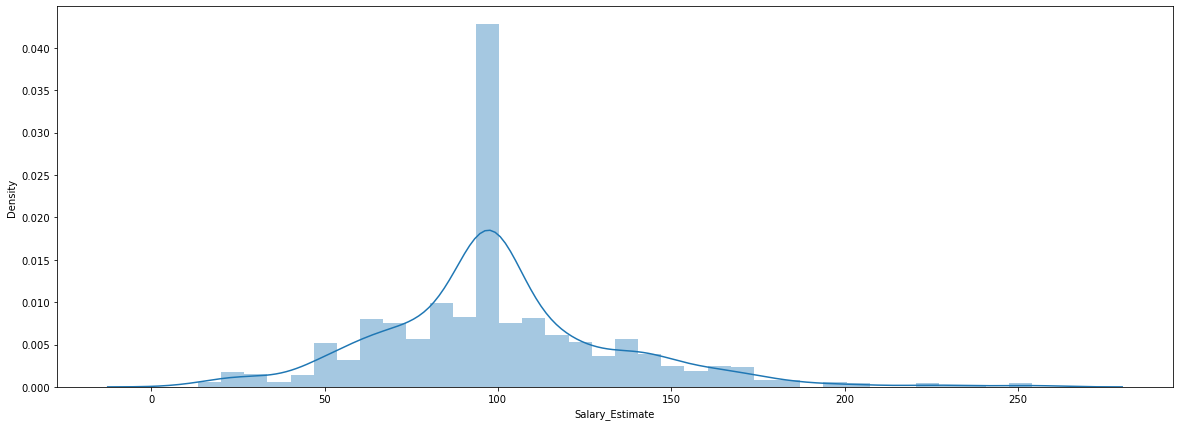

In [47]:
plt.figure(figsize = (20, 7))
sns.distplot(df.Salary_Estimate)

(array([ 28.,  78., 177., 404., 124.,  89.,  39.,   9.,   3.,   5.]),
 array([ 13.5 ,  37.55,  61.6 ,  85.65, 109.7 , 133.75, 157.8 , 181.85,
        205.9 , 229.95, 254.  ]),
 <a list of 10 Patch objects>)

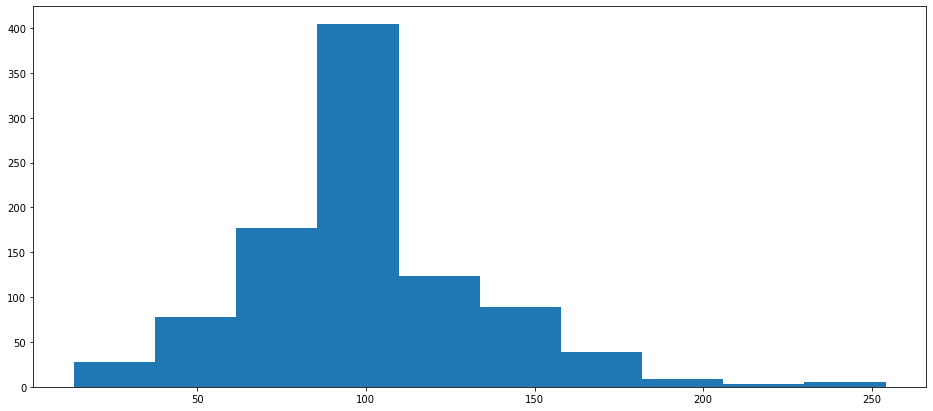

In [48]:
plt.figure(figsize = (16, 7))
plt.hist(df['Salary_Estimate'])

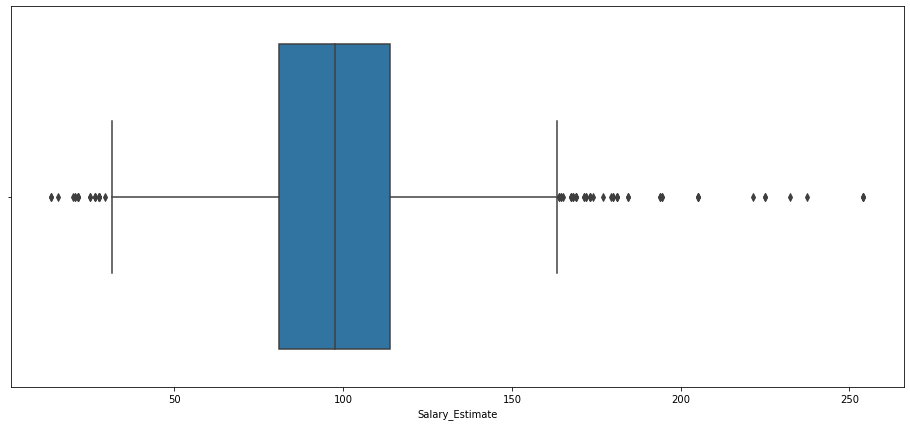

In [49]:
plt.figure(figsize = (16, 7))
sns.boxplot(df['Salary_Estimate'])

Job Description

In [50]:
len(df['Job_Description'].unique())

596

In [51]:
def job_desc(python_job):
    if 'python' in python_job.lower():
        return 1
    else:
        return 0

def job_desc_excel(excel_job):
    if 'excel' in excel_job.lower():
        return 1
    else:
        return 0
    
def job_desc_sql(sql_job):
    if 'sql' in sql_job.lower():
        return 1
    else:
        return 0
    
def job_desc_tableau(tableau_job):
    if 'tableau' in tableau_job.lower():
        return 1
    else:
        return 0    

df['Python_Job'] = df['Job_Description'].apply(job_desc)
print(df['Python_Job'].value_counts())
print()

df['Excel_Job'] = df['Job_Description'].apply(job_desc_excel)
print(df['Excel_Job'].value_counts())
print()

df['SQL_Job'] = df['Job_Description'].apply(job_desc_sql)
print(df['SQL_Job'].value_counts())
print()

df['Tableau_Job'] = df['Job_Description'].apply(job_desc_tableau)
print(df['Tableau_Job'].value_counts())

1    496
0    460
Name: Python_Job, dtype: int64

1    486
0    470
Name: Excel_Job, dtype: int64

1    480
0    476
Name: SQL_Job, dtype: int64

0    768
1    188
Name: Tableau_Job, dtype: int64


In [52]:
df.columns

Index(['Job_title', 'Salary_Estimate', 'Job_Description', 'Rating',
       'Company_Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type_of_ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Python_Job', 'Excel_Job', 'SQL_Job', 'Tableau_Job'],
      dtype='object')

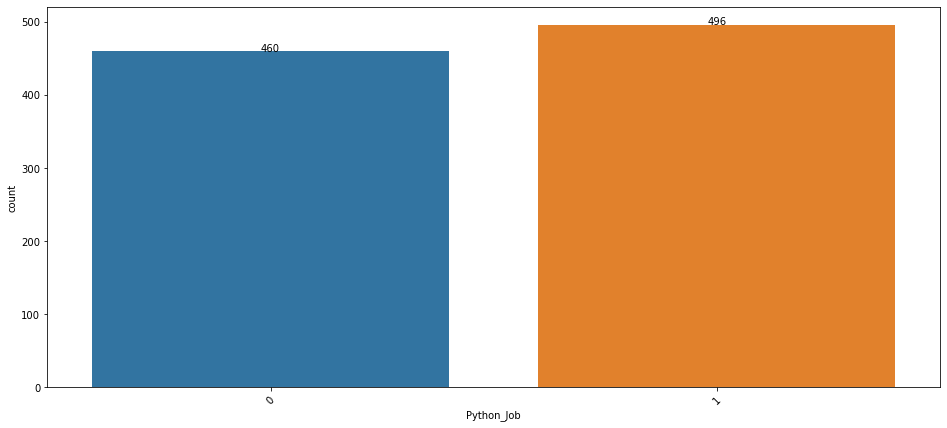

In [53]:
fig, ax1 = plt.subplots(figsize=(16, 7))
graph = sns.countplot(ax = ax1,x = 'Python_Job', data = df)
graph.set_xticklabels(graph.get_xticklabels(),rotation = 45)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x() + p.get_width()/2., height + 0.1,height ,ha="center")

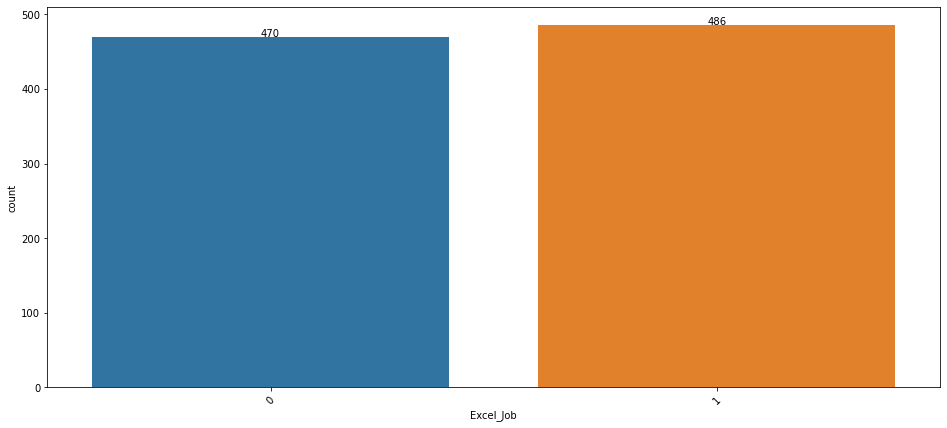

In [54]:
fig, ax1 = plt.subplots(figsize=(16, 7))
graph = sns.countplot(ax = ax1,x = 'Excel_Job', data = df)
graph.set_xticklabels(graph.get_xticklabels(),rotation = 45)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x() + p.get_width()/2., height + 0.1,height ,ha="center")

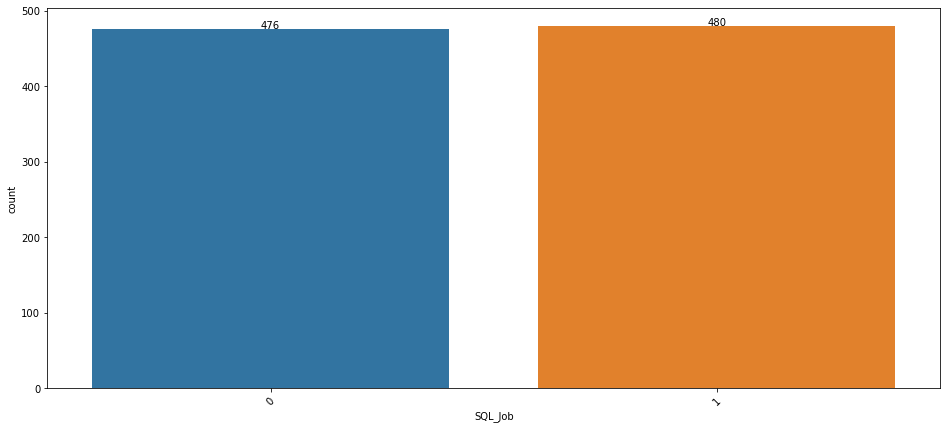

In [55]:
fig, ax1 = plt.subplots(figsize=(16, 7))
graph = sns.countplot(ax = ax1,x = 'SQL_Job', data = df)
graph.set_xticklabels(graph.get_xticklabels(),rotation = 45)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x() + p.get_width()/2., height + 0.1,height ,ha="center")

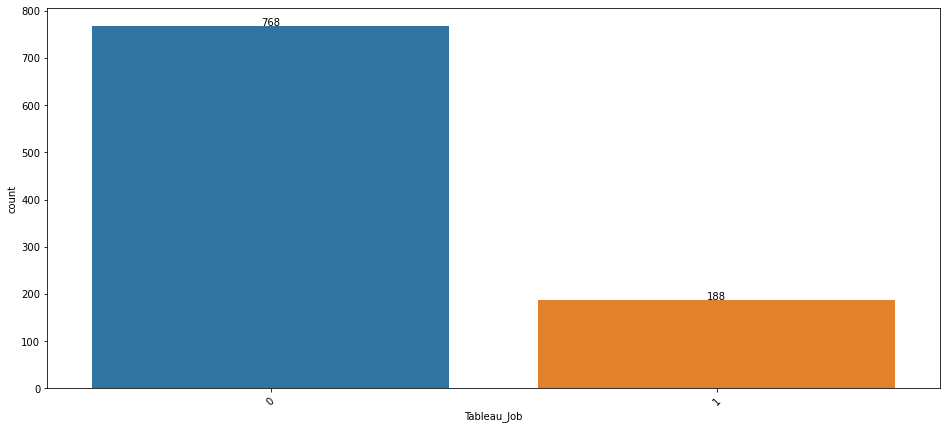

In [56]:
fig, ax1 = plt.subplots(figsize=(16, 7))
graph = sns.countplot(ax = ax1,x = 'Tableau_Job', data = df)
graph.set_xticklabels(graph.get_xticklabels(),rotation = 45)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x() + p.get_width()/2., height + 0.1,height ,ha="center")

In [57]:
df.shape

(956, 18)

In [58]:
df.drop('Job_Description', axis = 1, inplace = True)
df.shape

(956, 17)

Rating

In [59]:
df.Rating.dtype

dtype('float64')

In [60]:
df.Rating.describe()

count    956.000000
mean       3.601255
std        1.067619
min       -1.000000
25%        3.300000
50%        3.800000
75%        4.200000
max        5.000000
Name: Rating, dtype: float64

In [61]:
len(df.Rating.unique())

32

In [62]:
df.Rating.value_counts()

 3.8    75
 3.9    69
 3.7    69
 4.0    56
 3.6    56
 3.5    53
 3.4    47
 4.4    46
 3.3    44
 4.2    41
 4.3    39
 4.7    38
 4.1    37
 3.2    36
-1.0    34
 3.1    30
 5.0    28
 2.9    22
 4.5    19
 4.6    18
 2.7    17
 3.0    17
 4.8    14
 2.6    14
 2.4     8
 2.8     7
 2.1     5
 2.3     4
 4.9     4
 2.2     3
 2.5     3
 1.9     3
Name: Rating, dtype: int64

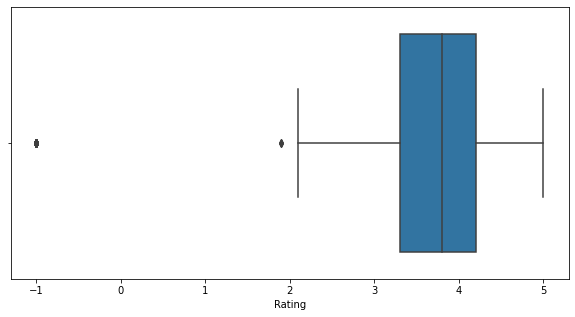

In [63]:
plt.figure(figsize = (10, 5))
sns.boxplot(df['Rating'])

Text(0.5, 1.0, 'Before Handling -1 value')

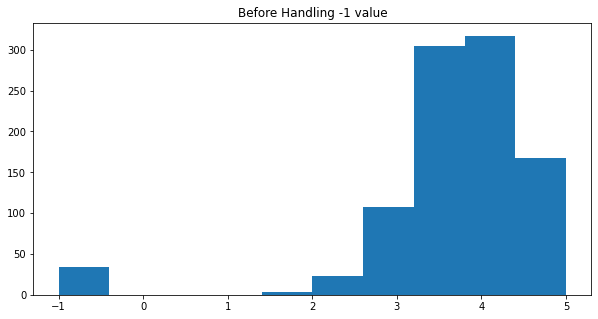

In [64]:
plt.figure(figsize = (10, 5))
plt.hist(df['Rating'])
plt.title("Before Handling -1 value")

Text(0.5, 1.0, 'Before Handling -1 value')

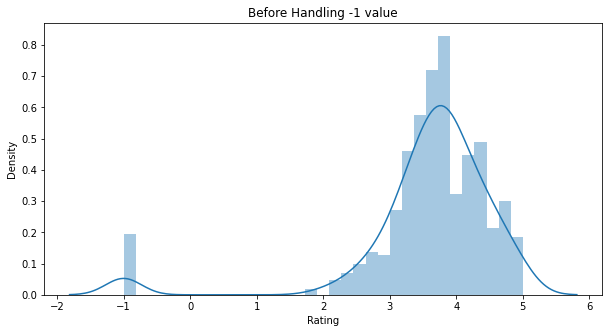

In [65]:
plt.figure(figsize = (10, 5))
sns.distplot(df['Rating'])
plt.title("Before Handling -1 value")

In [66]:
df.Rating.skew(), df.Rating.kurt()

(-2.7421712823627082, 9.679328502239896)

In [67]:
df['Rating'] = df['Rating'].replace(-1, np.NaN)
df['Rating'].isnull().sum()

34

In [68]:
df['Rating'].fillna(df['Rating'].median(), inplace = True)
df['Rating'].isnull().sum()

0

Text(0.5, 1.0, 'After Handling -1 value')

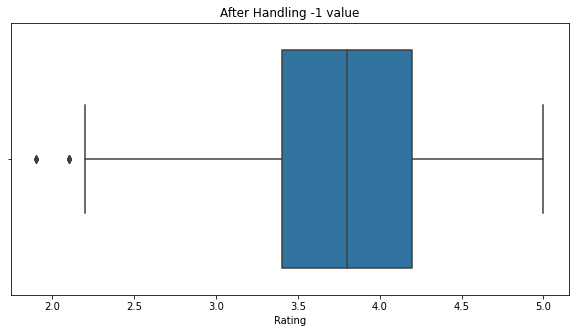

In [69]:
plt.figure(figsize = (10, 5))
sns.boxplot(df['Rating'])
plt.title("After Handling -1 value")

Text(0.5, 1.0, 'After Handling -1 value')

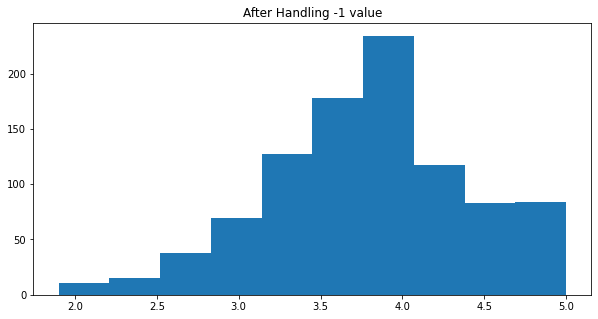

In [70]:
plt.figure(figsize = (10, 5))
plt.hist(df['Rating'])
plt.title("After Handling -1 value")

Text(0.5, 1.0, 'After Handling -1 value')

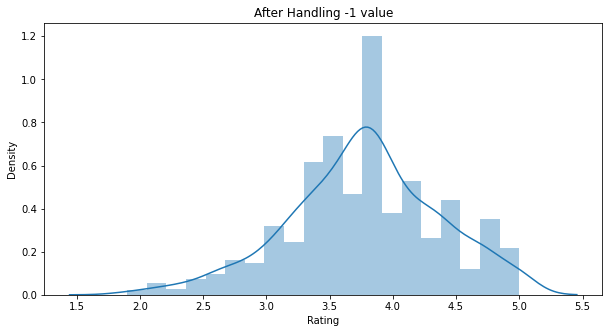

In [71]:
plt.figure(figsize = (10, 5))
sns.distplot(df['Rating'])
plt.title("After Handling -1 value")

Text(0.5, 1.0, 'After Handling -1 value')

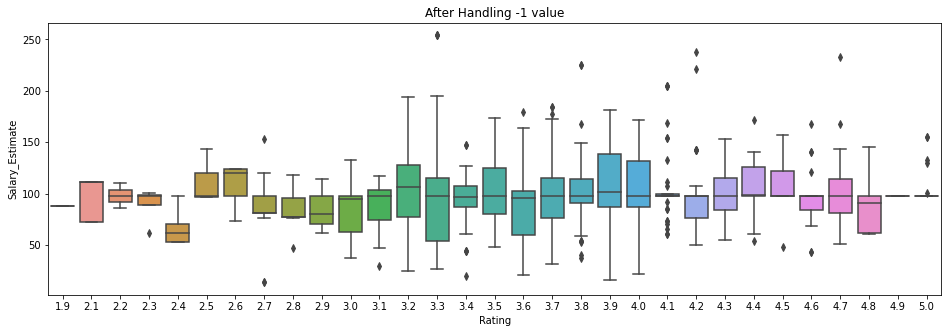

In [72]:
plt.figure(figsize = (16, 5))
sns.boxplot(x = 'Rating', y = 'Salary_Estimate', data = df)
plt.title("After Handling -1 value")

Text(0.5, 1.0, 'After Handling -1 value')

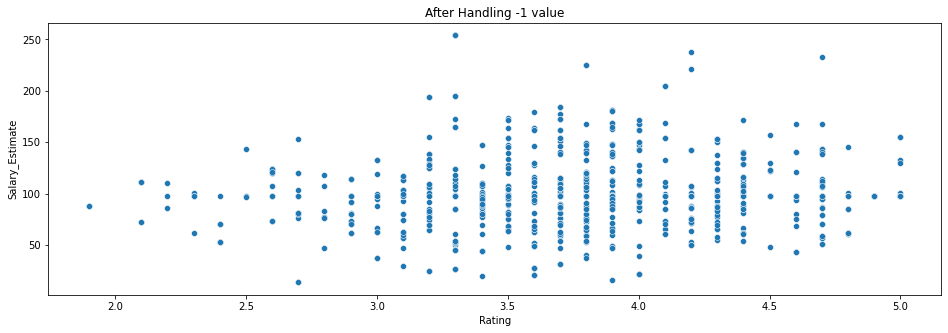

In [73]:
plt.figure(figsize = (16, 5))
sns.scatterplot(x = 'Rating', y = 'Salary_Estimate', data = df)
plt.title("After Handling -1 value")

Text(0.5, 1.0, 'After Handling -1 value')

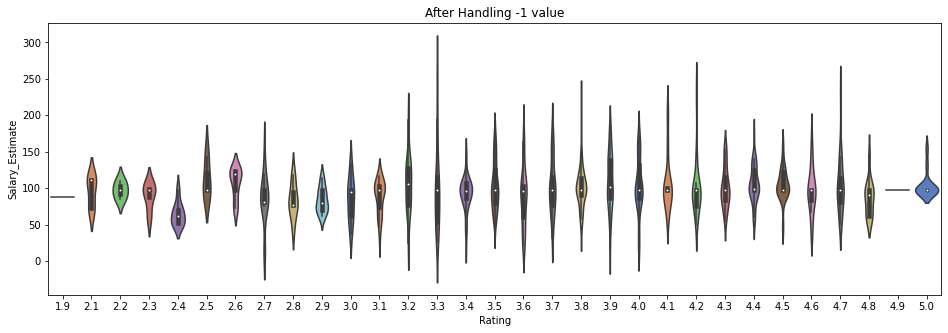

In [74]:
plt.figure(figsize = (16, 5))
sns.violinplot(x="Rating", y="Salary_Estimate", data = df, palette="muted")
plt.title("After Handling -1 value")

Text(0.5, 1.0, 'After Handling -1 value')

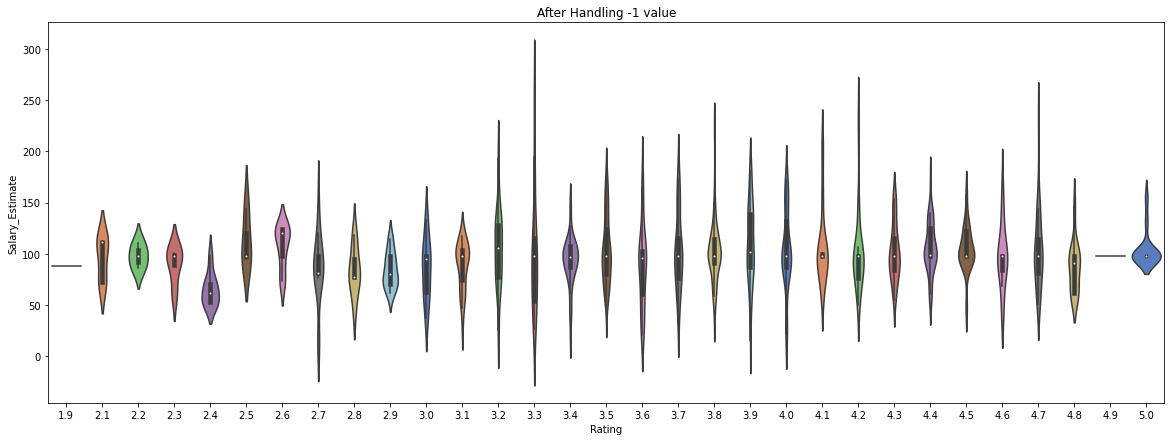

In [75]:
plt.figure(figsize = (20, 7))
sns.violinplot(x="Rating", y="Salary_Estimate", data = df, palette="muted", split = True)
plt.title("After Handling -1 value")

Company Name 

In [76]:
df.Company_Name.value_counts()

Novartis\n3.8                          14
Reynolds American\n3.1                 14
MassMutual\n3.6                        14
Takeda Pharmaceuticals\n3.7            14
Software Engineering Institute\n2.6    13
                                       ..
Boys Town\n3.8                          1
Vanda Pharmaceuticals\n2.3              1
SullivanCotter\n4.2                     1
DoubleVerify\n3.2                       1
iSeatz\n3.5                             1
Name: Company_Name, Length: 448, dtype: int64

In [77]:
len(df.Company_Name.unique())

448

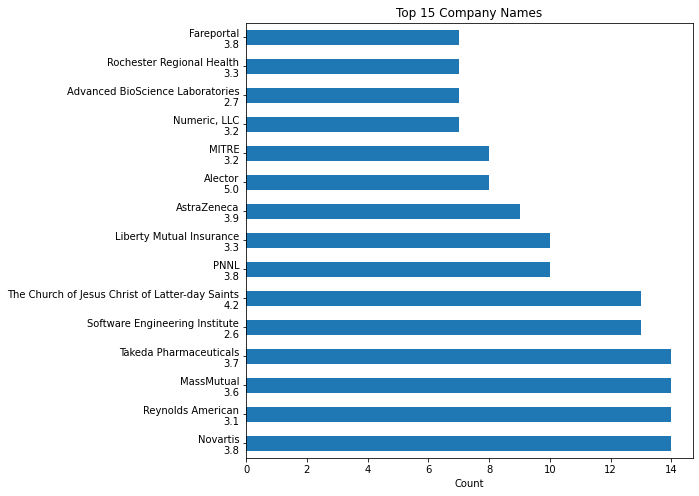

In [78]:
plt.figure(figsize=(8,8))
g = df["Company_Name"].value_counts().nlargest(15).plot(kind='barh')
p = plt.title('Top 15 Company Names')
p = plt.xlabel('Count')

In [79]:
df.columns

Index(['Job_title', 'Salary_Estimate', 'Rating', 'Company_Name', 'Location',
       'Headquarters', 'Size', 'Founded', 'Type_of_ownership', 'Industry',
       'Sector', 'Revenue', 'Competitors', 'Python_Job', 'Excel_Job',
       'SQL_Job', 'Tableau_Job'],
      dtype='object')

Location

In [80]:
len(df.Location.unique())

237

In [81]:
df['Location'] = df['Location'].apply(lambda x: x if ',' not in x else x.split(',')[1].strip())
len(df['Location'].unique())

46

In [82]:
df['Location'].value_counts().nlargest(15)

CA    210
MA    124
NY     96
VA     56
IL     48
PA     41
TX     39
MD     37
WA     25
NJ     22
NC     21
FL     21
UT     18
TN     18
GA     16
Name: Location, dtype: int64

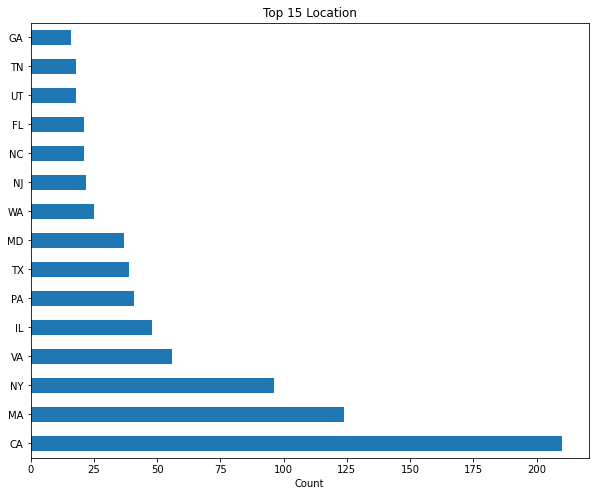

In [83]:
plt.figure(figsize=(10,8))
g = df["Location"].value_counts().nlargest(15).plot(kind='barh')
p = plt.title('Top 15 Location')
p = plt.xlabel('Count')

In [84]:
df['Location'].unique()[:]

array(['NM', 'MD', 'FL', 'WA', 'NY', 'TX', 'CA', 'VA', 'MA', 'NJ', 'CO',
       'IL', 'KY', 'Oregon', 'OR', 'CT', 'MI', 'AZ', 'DC', 'OH', 'AL',
       'MO', 'RI', 'PA', 'GA', 'New Jersey', 'IN', 'LA', 'WI', 'Virginia',
       'NC', 'MN', 'NE', 'Los Angeles', 'UT', 'TN', 'DE', 'ID', 'AK',
       'United States', 'IA', 'SC', 'KS', 'PR', 'Maryland', 'Michigan'],
      dtype=object)

In [85]:
df['Location'] = df['Location'].replace(['New Jersey', 'Virginia', 'Los Angeles', 'Maryland', 'Michigan', 'United States'],
                                        ["NJ", "VA", "LA", "MD", "MI", "IL"])

In [86]:
len(df['Location'].unique())

40

In [87]:
df['Location'].unique()[:]

array(['NM', 'MD', 'FL', 'WA', 'NY', 'TX', 'CA', 'VA', 'MA', 'NJ', 'CO',
       'IL', 'KY', 'Oregon', 'OR', 'CT', 'MI', 'AZ', 'DC', 'OH', 'AL',
       'MO', 'RI', 'PA', 'GA', 'IN', 'LA', 'WI', 'NC', 'MN', 'NE', 'UT',
       'TN', 'DE', 'ID', 'AK', 'IA', 'SC', 'KS', 'PR'], dtype=object)

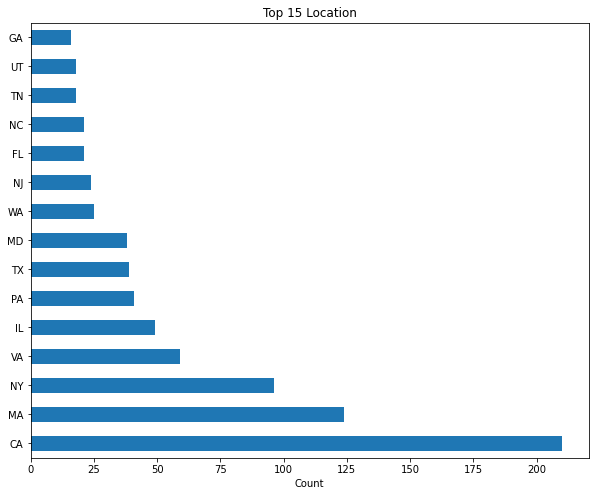

In [88]:
plt.figure(figsize=(10,8))
g = df["Location"].value_counts().nlargest(15).plot(kind='barh')
p = plt.title('Top 15 Location')
p = plt.xlabel('Count')

Headquarters

In [89]:
len(df.Headquarters.unique())

235

In [90]:
df['Headquarters'] = df['Headquarters'].apply(lambda x: x if ',' not in x else x.split(',')[1].strip())
len(df['Headquarters'].unique())

51

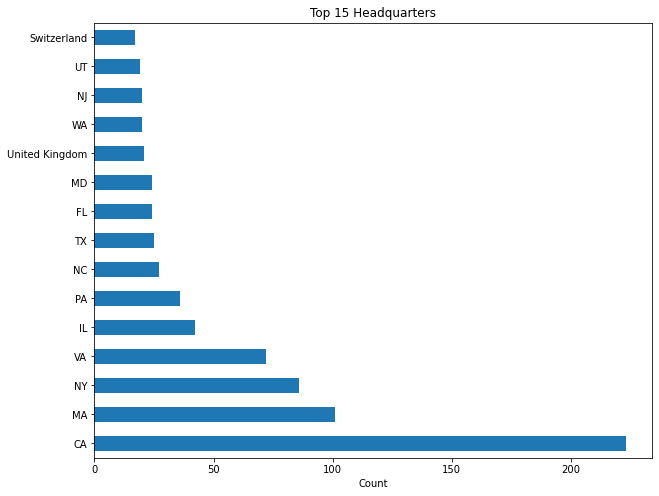

In [91]:
plt.figure(figsize=(10,8))
g = df["Headquarters"].value_counts().nlargest(15).plot(kind='barh')
p = plt.title('Top 15 Headquarters')
p = plt.xlabel('Count')

In [92]:
df['Headquarters'].unique()[:]

array(['CA', 'MD', 'FL', 'WA', 'NY', 'TX', 'VA', 'AR', 'Japan', 'NJ',
       'MA', 'CO', 'ID', 'GA', 'MI', 'Switzerland', 'IL', 'Germany', 'CT',
       'NE', 'United Kingdom', 'AL', 'MO', 'RI', 'OH', 'PA', 'Belgium',
       'China', 'LA', 'DC', 'MN', 'AZ', 'IN', 'SC', 'UT', 'TN', 'WI',
       'DE', 'Bermuda', 'South Korea', 'AK', 'NV', 'IA', 'India', 'NC',
       'Singapore', '-1', 'OR', 'Spain', 'France', 'PR'], dtype=object)

In [93]:
df['Headquarters'] = df['Headquarters'].replace("-1", np.NaN)
df['Headquarters'].unique()[:]

array(['CA', 'MD', 'FL', 'WA', 'NY', 'TX', 'VA', 'AR', 'Japan', 'NJ',
       'MA', 'CO', 'ID', 'GA', 'MI', 'Switzerland', 'IL', 'Germany', 'CT',
       'NE', 'United Kingdom', 'AL', 'MO', 'RI', 'OH', 'PA', 'Belgium',
       'China', 'LA', 'DC', 'MN', 'AZ', 'IN', 'SC', 'UT', 'TN', 'WI',
       'DE', 'Bermuda', 'South Korea', 'AK', 'NV', 'IA', 'India', 'NC',
       'Singapore', nan, 'OR', 'Spain', 'France', 'PR'], dtype=object)

In [94]:
df['Headquarters'].mode()

0    CA
dtype: object

In [95]:
df['Headquarters'].fillna("CA", inplace = True)

In [96]:
df['Headquarters'].isnull().sum()

0

In [97]:
df['Headquarters'].unique()[:]

array(['CA', 'MD', 'FL', 'WA', 'NY', 'TX', 'VA', 'AR', 'Japan', 'NJ',
       'MA', 'CO', 'ID', 'GA', 'MI', 'Switzerland', 'IL', 'Germany', 'CT',
       'NE', 'United Kingdom', 'AL', 'MO', 'RI', 'OH', 'PA', 'Belgium',
       'China', 'LA', 'DC', 'MN', 'AZ', 'IN', 'SC', 'UT', 'TN', 'WI',
       'DE', 'Bermuda', 'South Korea', 'AK', 'NV', 'IA', 'India', 'NC',
       'Singapore', 'OR', 'Spain', 'France', 'PR'], dtype=object)

In [98]:
df['Location'].unique()[:]

array(['NM', 'MD', 'FL', 'WA', 'NY', 'TX', 'CA', 'VA', 'MA', 'NJ', 'CO',
       'IL', 'KY', 'Oregon', 'OR', 'CT', 'MI', 'AZ', 'DC', 'OH', 'AL',
       'MO', 'RI', 'PA', 'GA', 'IN', 'LA', 'WI', 'NC', 'MN', 'NE', 'UT',
       'TN', 'DE', 'ID', 'AK', 'IA', 'SC', 'KS', 'PR'], dtype=object)

In [99]:
df['Headquarters'] = df['Headquarters'].replace(['Japan', 'Germany', 'Switzerland', 'United Kingdom', 'Belgium',
                       'China', 'Bermuda', 'South Korea', 'India', 'Singapore', 'Spain', 'France'], 
                        ["JP", "GE", "SW", "UK", "BG", "CH", "BE", "SK", "IND", "SG", "SP", "FR"])
df['Location'].unique()[:]

array(['NM', 'MD', 'FL', 'WA', 'NY', 'TX', 'CA', 'VA', 'MA', 'NJ', 'CO',
       'IL', 'KY', 'Oregon', 'OR', 'CT', 'MI', 'AZ', 'DC', 'OH', 'AL',
       'MO', 'RI', 'PA', 'GA', 'IN', 'LA', 'WI', 'NC', 'MN', 'NE', 'UT',
       'TN', 'DE', 'ID', 'AK', 'IA', 'SC', 'KS', 'PR'], dtype=object)

In [100]:
len(df['Headquarters'].unique())

50

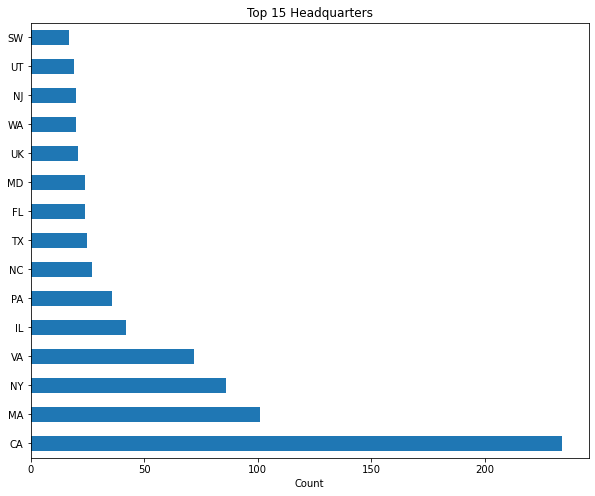

In [101]:
plt.figure(figsize=(10,8))
g = df["Headquarters"].value_counts().nlargest(15).plot(kind='barh')
p = plt.title('Top 15 Headquarters')
p = plt.xlabel('Count')

In [102]:
df['Job_available'] = df.apply(lambda x: 1 if x['Location'] == x['Headquarters'] else 0, axis=1)

In [103]:
df['Job_available'].value_counts()

1    640
0    316
Name: Job_available, dtype: int64

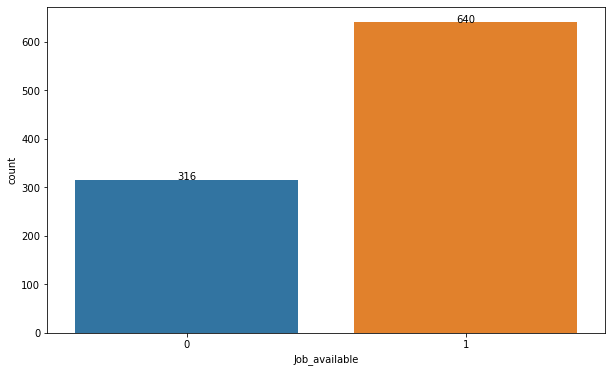

In [104]:
fig, ax1 = plt.subplots(figsize=(10, 6))
graph = sns.countplot(ax = ax1,x = 'Job_available', data = df)
graph.set_xticklabels(graph.get_xticklabels())
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x() + p.get_width()/2., height + 0.1,height ,ha="center")

In [105]:
df.drop(['Location', "Headquarters"], axis = 1, inplace = True)
df.shape

(956, 16)

In [106]:
df.columns

Index(['Job_title', 'Salary_Estimate', 'Rating', 'Company_Name', 'Size',
       'Founded', 'Type_of_ownership', 'Industry', 'Sector', 'Revenue',
       'Competitors', 'Python_Job', 'Excel_Job', 'SQL_Job', 'Tableau_Job',
       'Job_available'],
      dtype='object')

Size 

In [107]:
df.Size.value_counts()

1001 to 5000 employees     177
201 to 500 employees       160
51 to 200 employees        155
10000+ employees           154
501 to 1000 employees      144
5001 to 10000 employees     79
1 to 50 employees           61
Unknown                     15
-1                          11
Name: Size, dtype: int64

In [108]:
df['Size'] = df['Size'].replace("-1", "Unknown")
df.Size.value_counts()

1001 to 5000 employees     177
201 to 500 employees       160
51 to 200 employees        155
10000+ employees           154
501 to 1000 employees      144
5001 to 10000 employees     79
1 to 50 employees           61
Unknown                     26
Name: Size, dtype: int64

In [109]:
size_map = {'Unknown': 0, '1 to 50 employees': 1, '51 to 200 employees': 2, '201 to 500 employees': 3,
            '501 to 1000 employees': 4, '1001 to 5000 employees': 5, '5001 to 10000 employees': 6, '10000+ employees': 7}

df['Company_Size'] = df['Size'].map(size_map)
df.Company_Size.value_counts()

5    177
3    160
2    155
7    154
4    144
6     79
1     61
0     26
Name: Company_Size, dtype: int64

In [110]:
df.drop('Size', inplace = True, axis = 1)
df.shape

(956, 16)

Founded

In [111]:
df.Founded.dtype

dtype('int64')

In [112]:
len(df.Founded.unique())

109

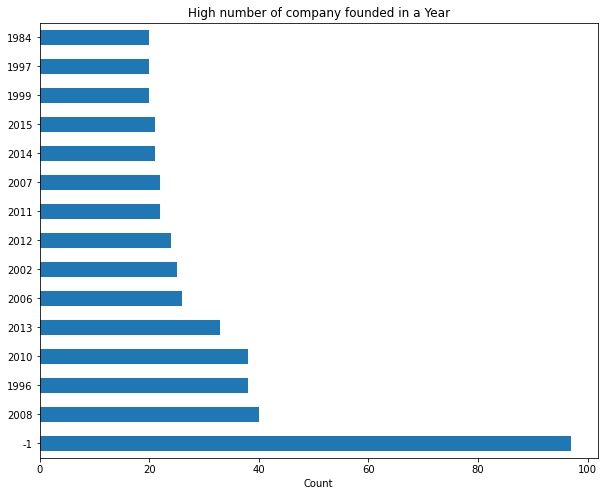

In [113]:
plt.figure(figsize=(10,8))
g = df["Founded"].value_counts().nlargest(15).plot(kind='barh')
p = plt.title('High number of company founded in a Year')
p = plt.xlabel('Count')

In [114]:
df["Founded"].value_counts().nlargest(15)

-1       97
 2008    40
 1996    38
 2010    38
 2013    33
 2006    26
 2002    25
 2012    24
 2011    22
 2007    22
 2014    21
 2015    21
 1999    20
 1997    20
 1984    20
Name: Founded, dtype: int64

Text(0.5, 1.0, 'Before Handling -1 value')

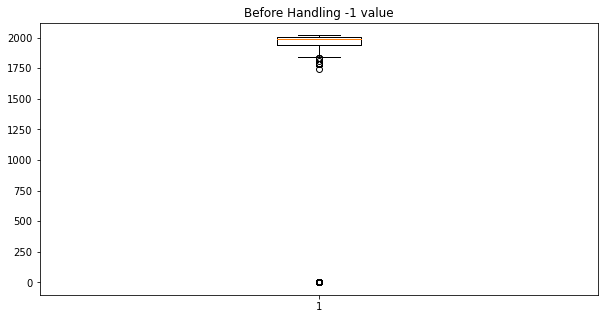

In [115]:
plt.figure(figsize = (10, 5))
plt.boxplot(df['Founded'])
plt.title("Before Handling -1 value")

Text(0.5, 1.0, 'Before Handling -1 value')

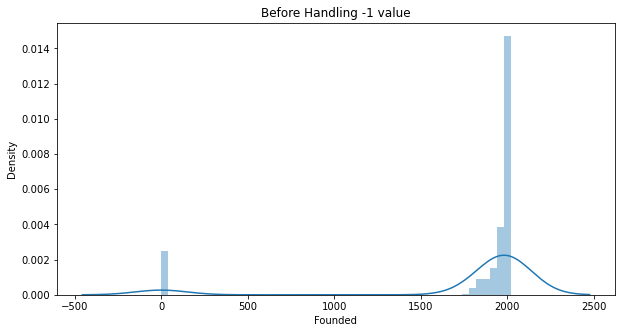

In [116]:
plt.figure(figsize = (10, 5))
sns.distplot(df['Founded'])
plt.title("Before Handling -1 value")

Text(0.5, 1.0, 'Before Handling -1 value')

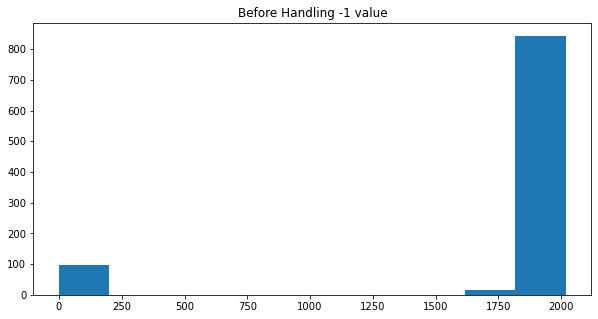

In [117]:
plt.figure(figsize = (10, 5))
plt.hist(df['Founded'])
plt.title("Before Handling -1 value")

In [118]:
df['Founded'] = df['Founded'].replace(-1, np.NaN)
df['Founded'].fillna(df['Founded'].median(), inplace = True)
df['Founded'].value_counts().nlargest(15)

1996.0    135
2008.0     40
2010.0     38
2013.0     33
2006.0     26
2002.0     25
2012.0     24
2007.0     22
2011.0     22
2015.0     21
2014.0     21
1997.0     20
1984.0     20
1999.0     20
1958.0     18
Name: Founded, dtype: int64

Text(0.5, 1.0, 'After Handling -1 value')

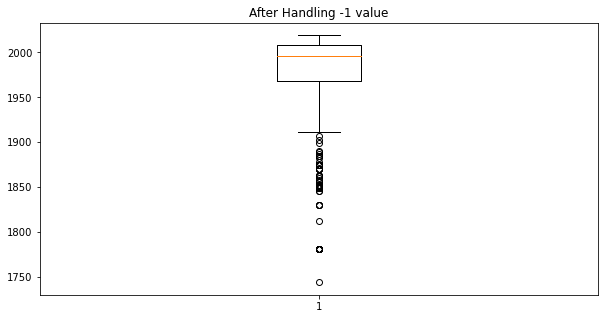

In [119]:
plt.figure(figsize = (10, 5))
plt.boxplot(df['Founded'])
plt.title("After Handling -1 value")

Text(0.5, 1.0, 'After Handling -1 value')

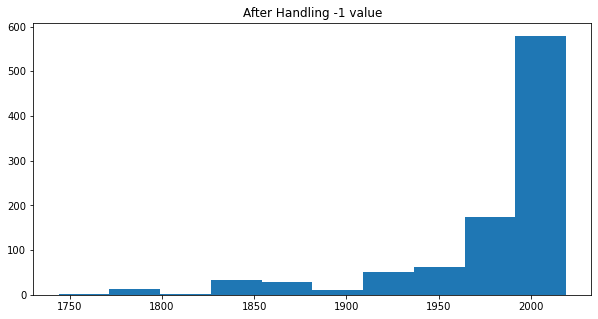

In [120]:
plt.figure(figsize = (10, 5))
plt.hist(df['Founded'])
plt.title("After Handling -1 value")

Text(0.5, 1.0, 'After Handling -1 value')

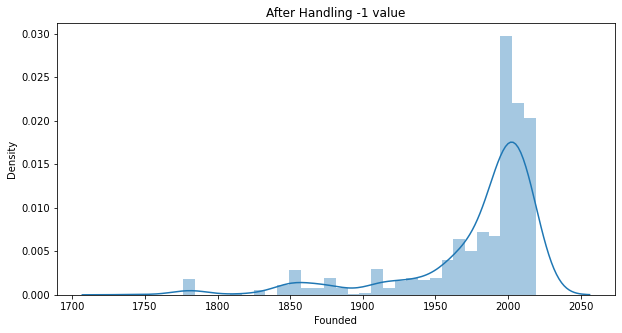

In [121]:
plt.figure(figsize = (10, 5))
sns.distplot(df['Founded'])
plt.title("After Handling -1 value")

Text(0.5, 1.0, 'After Handling -1 value')

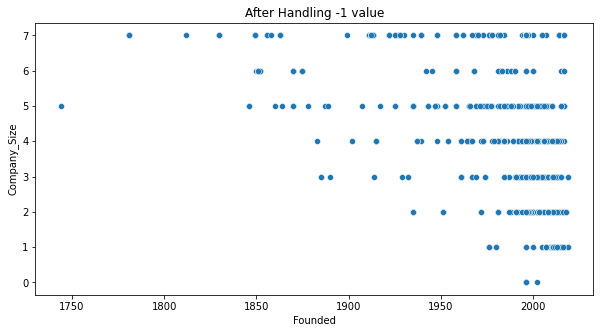

In [122]:
plt.figure(figsize = (10, 5))
sns.scatterplot(x = 'Founded', y = "Company_Size", data = df)
plt.title("After Handling -1 value")

Text(0.5, 1.0, 'After Handling -1 value')

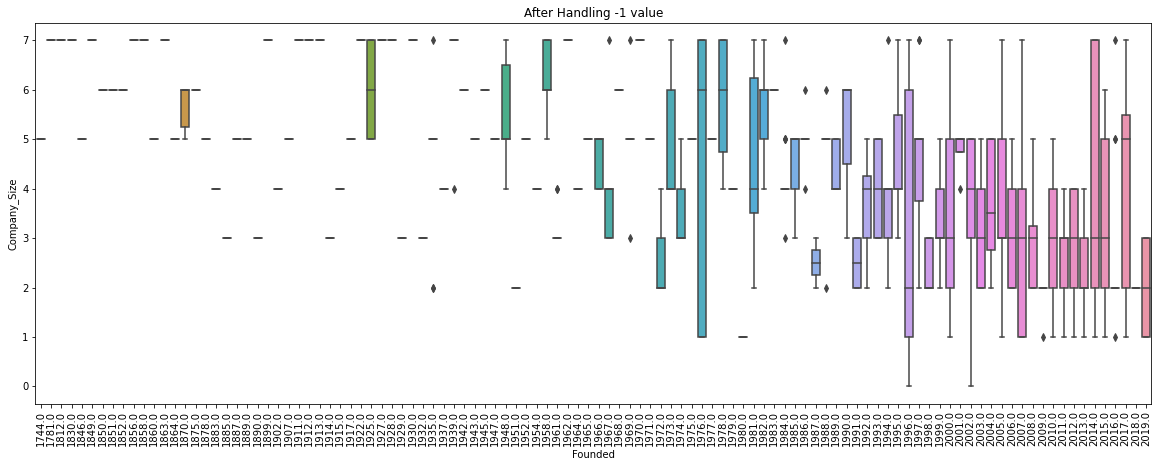

In [123]:
plt.figure(figsize = (20, 7))
sns.boxplot(x = 'Founded', y = "Company_Size", data = df)
plt.xticks(rotation = 90)
plt.title("After Handling -1 value")

Type_of_ownership

In [124]:
df.Type_of_ownership.dtype

dtype('O')

In [125]:
df.Type_of_ownership.value_counts()

Company - Private                 532
Company - Public                  237
Nonprofit Organization             65
Subsidiary or Business Segment     40
Government                         17
College / University               15
Hospital                           15
-1                                 11
Unknown                            11
Contract                            5
Other Organization                  5
School / School District            2
Private Practice / Firm             1
Name: Type_of_ownership, dtype: int64

In [126]:
df['Type_of_ownership'] = df['Type_of_ownership'].replace(['-1', "Unknown", "Other Organization", "Contract", 
                                                          "School / School District"], "Other")
df['Type_of_ownership'] = df['Type_of_ownership'].replace(["Company - Private", "Private Practice / Firm"], "Private")
df['Type_of_ownership'] = df['Type_of_ownership'].replace("Company - Public", "Public")

In [127]:
df.Type_of_ownership.value_counts()

Private                           533
Public                            237
Nonprofit Organization             65
Subsidiary or Business Segment     40
Other                              34
Government                         17
College / University               15
Hospital                           15
Name: Type_of_ownership, dtype: int64

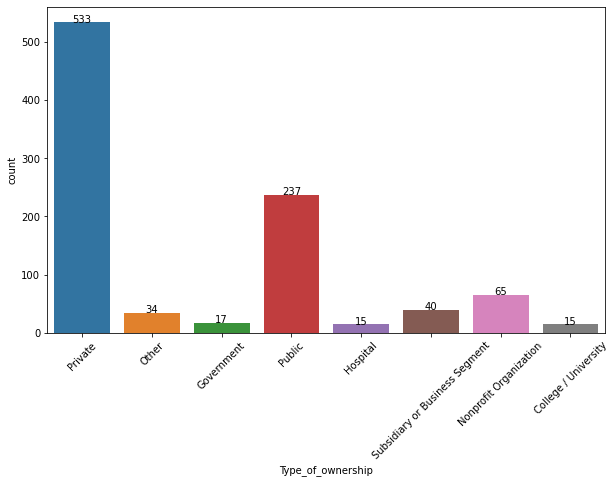

In [128]:
fig, ax1 = plt.subplots(figsize=(10, 6))
graph = sns.countplot(ax = ax1,x = 'Type_of_ownership', data = df)
graph.set_xticklabels(graph.get_xticklabels(), rotation = 45)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x() + p.get_width()/2., height + 0.1,height ,ha="center")

Industry

In [129]:
df.Industry.dtype

dtype('O')

In [130]:
len(df.Industry.value_counts())

63

In [131]:
df.Industry.value_counts().nlargest(20)

Biotech & Pharmaceuticals                  148
IT Services                                 77
Computer Hardware & Software                70
Insurance Carriers                          65
Enterprise Software & Network Solutions     56
Health Care Services & Hospitals            51
Staffing & Outsourcing                      39
-1                                          39
Internet                                    36
Consulting                                  34
Aerospace & Defense                         32
Advertising & Marketing                     25
Consumer Products Manufacturing             23
Research & Development                      21
Banks & Credit Unions                       19
Colleges & Universities                     18
Lending                                     14
Energy                                      14
Religious Organizations                     13
Federal Agencies                            13
Name: Industry, dtype: int64

In [132]:
df['Industry'] = df['Industry'].replace("-1", "Others")
df['Industry'].value_counts().nlargest(10)

Biotech & Pharmaceuticals                  148
IT Services                                 77
Computer Hardware & Software                70
Insurance Carriers                          65
Enterprise Software & Network Solutions     56
Health Care Services & Hospitals            51
Staffing & Outsourcing                      39
Others                                      39
Internet                                    36
Consulting                                  34
Name: Industry, dtype: int64

Sector

In [133]:
df.Sector.dtype

dtype('O')

In [134]:
len(df.Sector.unique())

25

In [135]:
df.Sector.value_counts().nlargest(10)

Information Technology       239
Biotech & Pharmaceuticals    148
Business Services            134
Insurance                     71
Finance                       56
Health Care                   51
Manufacturing                 40
-1                            39
Aerospace & Defense           32
Education                     26
Name: Sector, dtype: int64

In [136]:
df['Sector'] = df['Sector'].replace("-1", "Others")
df.Sector.value_counts().nlargest(10)

Information Technology       239
Biotech & Pharmaceuticals    148
Business Services            134
Insurance                     71
Finance                       56
Health Care                   51
Manufacturing                 40
Others                        39
Aerospace & Defense           32
Education                     26
Name: Sector, dtype: int64

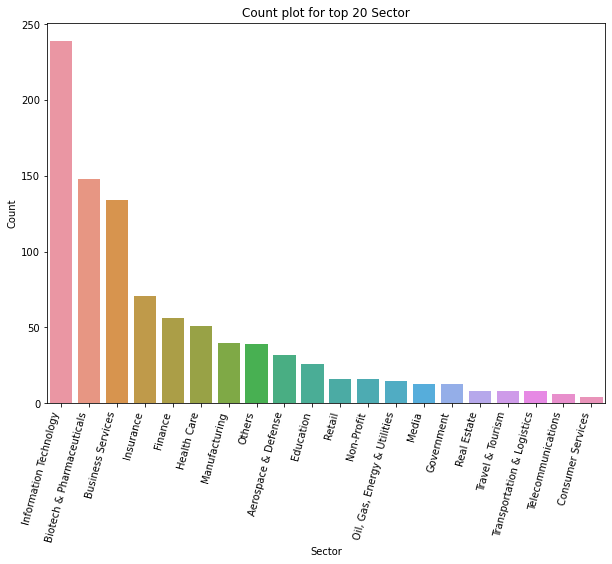

In [137]:
plt.figure(figsize=(10, 7))
g = sns.countplot(x='Sector', data=df, order = df['Sector'].value_counts()[:20].index)
p = plt.title('Count plot for top 20 Sector')
p = plt.xlabel('Sector')
p = plt.ylabel('Count')
p = g.set_xticklabels(g.get_xticklabels(), rotation=75, horizontalalignment='right')

In [138]:
len(df.Sector.value_counts())

25

In [139]:
df.Sector.value_counts().nlargest(26)

Information Technology                239
Biotech & Pharmaceuticals             148
Business Services                     134
Insurance                              71
Finance                                56
Health Care                            51
Manufacturing                          40
Others                                 39
Aerospace & Defense                    32
Education                              26
Retail                                 16
Non-Profit                             16
Oil, Gas, Energy & Utilities           15
Media                                  13
Government                             13
Real Estate                             8
Travel & Tourism                        8
Transportation & Logistics              8
Telecommunications                      6
Consumer Services                       4
Arts, Entertainment & Recreation        4
Construction, Repair & Maintenance      4
Mining & Metals                         3
Agriculture & Forestry            

In [140]:
list(df['Sector'].value_counts()[:10].index)

['Information Technology',
 'Biotech & Pharmaceuticals',
 'Business Services',
 'Insurance',
 'Finance',
 'Health Care',
 'Manufacturing',
 'Others',
 'Aerospace & Defense',
 'Education']

In [141]:
top_10 = list(df['Sector'].value_counts()[:10].index)
top_10

['Information Technology',
 'Biotech & Pharmaceuticals',
 'Business Services',
 'Insurance',
 'Finance',
 'Health Care',
 'Manufacturing',
 'Others',
 'Aerospace & Defense',
 'Education']

In [142]:
def Sector_list(top10):
    if top10 not in top_10:
        return "Others"
    else:
        return top10

df['Sector'] = df['Sector'].apply(Sector_list)

In [143]:
df.Sector.value_counts()

Information Technology       239
Others                       159
Biotech & Pharmaceuticals    148
Business Services            134
Insurance                     71
Finance                       56
Health Care                   51
Manufacturing                 40
Aerospace & Defense           32
Education                     26
Name: Sector, dtype: int64

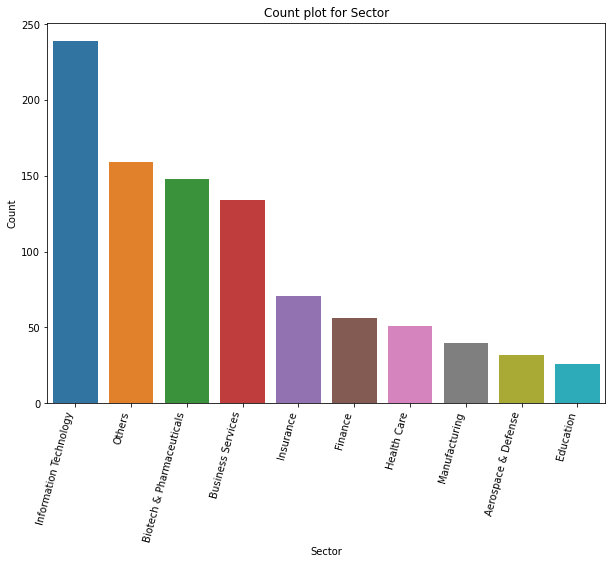

In [144]:
plt.figure(figsize=(10, 7))
g = sns.countplot(x='Sector', data=df, order = df['Sector'].value_counts().index)
p = plt.title('Count plot for Sector')
p = plt.xlabel('Sector')
p = plt.ylabel('Count')
p = g.set_xticklabels(g.get_xticklabels(), rotation=75, horizontalalignment='right')

Revenue

In [145]:
df['Revenue'].dtype

dtype('O')

In [146]:
len(df['Revenue'].unique())

14

In [147]:
df['Revenue'].value_counts()

Unknown / Non-Applicable            299
$10+ billion (USD)                  140
$100 to $500 million (USD)          107
$1 to $2 billion (USD)               68
$500 million to $1 billion (USD)     62
$25 to $50 million (USD)             59
$50 to $100 million (USD)            52
$2 to $5 billion (USD)               44
$10 to $25 million (USD)             39
$5 to $10 million (USD)              29
$5 to $10 billion (USD)              20
$1 to $5 million (USD)               17
-1                                   11
Less than $1 million (USD)            9
Name: Revenue, dtype: int64

In [148]:
df['Revenue'] = df['Revenue'].replace("-1", "Unknown / Non-Applicable")
df['Revenue'].value_counts()

Unknown / Non-Applicable            310
$10+ billion (USD)                  140
$100 to $500 million (USD)          107
$1 to $2 billion (USD)               68
$500 million to $1 billion (USD)     62
$25 to $50 million (USD)             59
$50 to $100 million (USD)            52
$2 to $5 billion (USD)               44
$10 to $25 million (USD)             39
$5 to $10 million (USD)              29
$5 to $10 billion (USD)              20
$1 to $5 million (USD)               17
Less than $1 million (USD)            9
Name: Revenue, dtype: int64

In [149]:
df['Revenue'].unique()

array(['$50 to $100 million (USD)', '$2 to $5 billion (USD)',
       '$100 to $500 million (USD)', '$500 million to $1 billion (USD)',
       'Unknown / Non-Applicable', '$1 to $2 billion (USD)',
       '$25 to $50 million (USD)', '$10+ billion (USD)',
       '$1 to $5 million (USD)', '$10 to $25 million (USD)',
       '$5 to $10 billion (USD)', 'Less than $1 million (USD)',
       '$5 to $10 million (USD)'], dtype=object)

In [150]:
revenue_size = {'Unknown / Non-Applicable': 0, 'Less than $1 million (USD)': 1, '$1 to $5 million (USD)': 2, 
                '$5 to $10 million (USD)': 3, '$10 to $25 million (USD)': 4, '$25 to $50 million (USD)': 5, 
                '$50 to $100 million (USD)': 6, '$100 to $500 million (USD)': 7, '$500 million to $1 billion (USD)': 8, 
                '$1 to $2 billion (USD)': 9, '$2 to $5 billion (USD)':10, '$5 to $10 billion (USD)':11,
                '$10+ billion (USD)':12}

df['Revenue'] = df['Revenue'].map(revenue_size)
df['Revenue'].value_counts()

0     310
12    140
7     107
9      68
8      62
5      59
6      52
10     44
4      39
3      29
11     20
2      17
1       9
Name: Revenue, dtype: int64

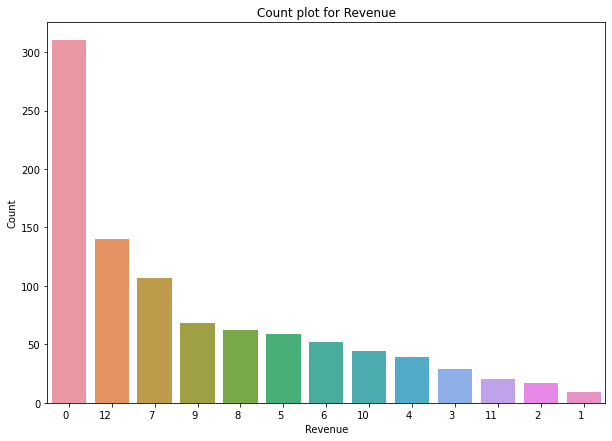

In [151]:
plt.figure(figsize=(10, 7))
g = sns.countplot(x='Revenue', data=df, order = df['Revenue'].value_counts().index)
p = plt.title('Count plot for Revenue')
p = plt.xlabel('Revenue')
p = plt.ylabel('Count')
p = g.set_xticklabels(g.get_xticklabels(), horizontalalignment='right')

Competitors

In [152]:
df['Competitors'].dtype

dtype('O')

In [153]:
len(df['Competitors'].unique())

149

In [154]:
df['Competitors'].value_counts().nlargest(10)

-1                                                                                              634
Novartis, Baxter, Pfizer                                                                         14
Oak Ridge National Laboratory, National Renewable Energy Lab, Los Alamos National Laboratory     12
Travelers, Allstate, State Farm                                                                  10
Roche, GlaxoSmithKline, Novartis                                                                  9
Battelle, General Atomics, SAIC                                                                   8
Expedia Group, Orbitz Worldwide, Priceline.com                                                    7
FLURRY, Chartboost                                                                                6
Leidos, CACI International, Booz Allen Hamilton                                                   6
Pitney Bowes                                                                                      6


In [155]:
df['Competitors'].unique()[:]

array(['-1',
       'Oak Ridge National Laboratory, National Renewable Energy Lab, Los Alamos National Laboratory',
       'Commerce Signals, Cardlytics, Yodlee',
       'Digital Realty, CoreSite, Equinix', 'Clicktripz, SmarterTravel',
       'Target, Costco Wholesale, Amazon', 'Novartis, Baxter, Pfizer',
       'bluebird bio, Agios Pharmaceuticals, Celgene',
       "Angie's List, HomeAdvisor, Thumbtack",
       'Leidos, CACI International, Booz Allen Hamilton',
       'Thermo Fisher Scientific, Enzymatics, Illumina', 'Pitney Bowes',
       'BrowserStack, Selenium Master, Perfecto Mobile',
       'Unilever, Procter & Gamble, Henkel',
       'UDR, AvalonBay Communities, Essex Property Trust',
       'American Express, Mastercard, Discover',
       'TASC, Vencore, Booz Allen Hamilton',
       'John Deere, Komatsu, CNH Industrial',
       'Travelers, Allstate, State Farm', 'Munich Re, Hannover RE, SCOR',
       'Skyhigh Networks, Zscaler, NortonLifeLock',
       'Slalom, Daugherty Busines

In [156]:
df['Competitors'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)
df['Competitors'].value_counts()

0    634
3    253
2     50
1     18
4      1
Name: Competitors, dtype: int64

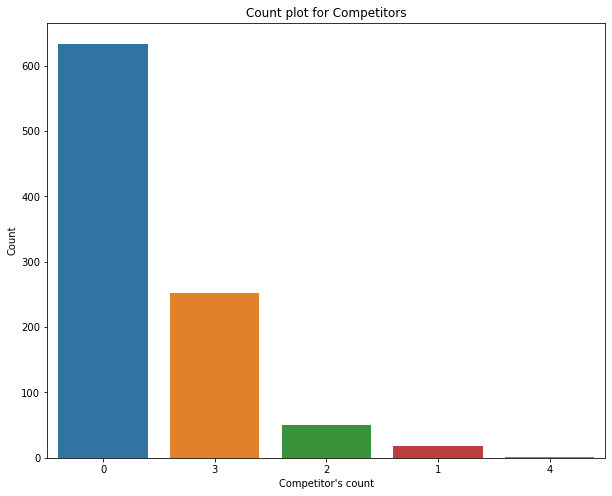

In [157]:
plt.figure(figsize=(10,8))
g = sns.countplot(x='Competitors', data=df, order = df['Competitors'].value_counts().index)
p = plt.title('Count plot for Competitors')
p = plt.xlabel("Competitor's count")
p = plt.ylabel('Count')

In [158]:
df.columns

Index(['Job_title', 'Salary_Estimate', 'Rating', 'Company_Name', 'Founded',
       'Type_of_ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Python_Job', 'Excel_Job', 'SQL_Job', 'Tableau_Job', 'Job_available',
       'Company_Size'],
      dtype='object')

In [159]:
df = df[['Job_title', 'Rating', 'Company_Name', 'Founded',
       'Type_of_ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Python_Job', 'Excel_Job', 'SQL_Job', 'Tableau_Job', 'Job_available',
       'Company_Size', 'Salary_Estimate']]
df.head()

,Job_title,Rating,Company_Name,Founded,Type_of_ownership,Industry,Sector,Revenue,Competitors,Python_Job,Excel_Job,SQL_Job,Tableau_Job,Job_available,Company_Size,Salary_Estimate
0,Data Scientist,3.8,Tecolote Research\n3.8,1973.0,Private,Aerospace & Defense,Aerospace & Defense,6,0,1,1,0,1,0,4,72.0
1,Data Scientist,3.4,University of Maryland Medical System\n3.4,1984.0,Other,Health Care Services & Hospitals,Health Care,10,0,1,0,0,0,1,7,87.5
2,Data Scientist,4.8,KnowBe4\n4.8,2010.0,Private,Security Services,Business Services,7,0,1,1,1,0,1,4,85.0
3,Data Scientist,3.8,PNNL\n3.8,1965.0,Government,Energy,Others,8,3,1,0,0,0,1,5,76.5
4,Data Scientist,2.9,Affinity Solutions\n2.9,1998.0,Private,Advertising & Marketing,Business Services,0,3,1,1,1,0,1,2,114.5


In [160]:
df.shape

(956, 16)

# Correlation and Skewness

In [161]:
df.dtypes

Job_title             object
Rating               float64
Company_Name          object
Founded              float64
Type_of_ownership     object
Industry              object
Sector                object
Revenue                int64
Competitors            int64
Python_Job             int64
Excel_Job              int64
SQL_Job                int64
Tableau_Job            int64
Job_available          int64
Company_Size           int64
Salary_Estimate      float64
dtype: object

Text(0.5, 1.0, 'Correlation matrix for Rating, Founded, and Salary columns')

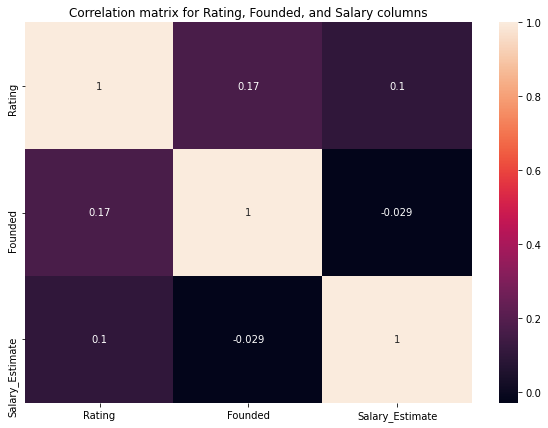

In [162]:
plt.figure(figsize=(10, 7))

num_data = df[['Rating', "Founded","Salary_Estimate"]].corr()

#mask = np.triu(np.ones_like(num_data, dtype=np.bool))

sns.heatmap(num_data,  annot=True)
plt.title('Correlation matrix for Rating, Founded, and Salary columns')

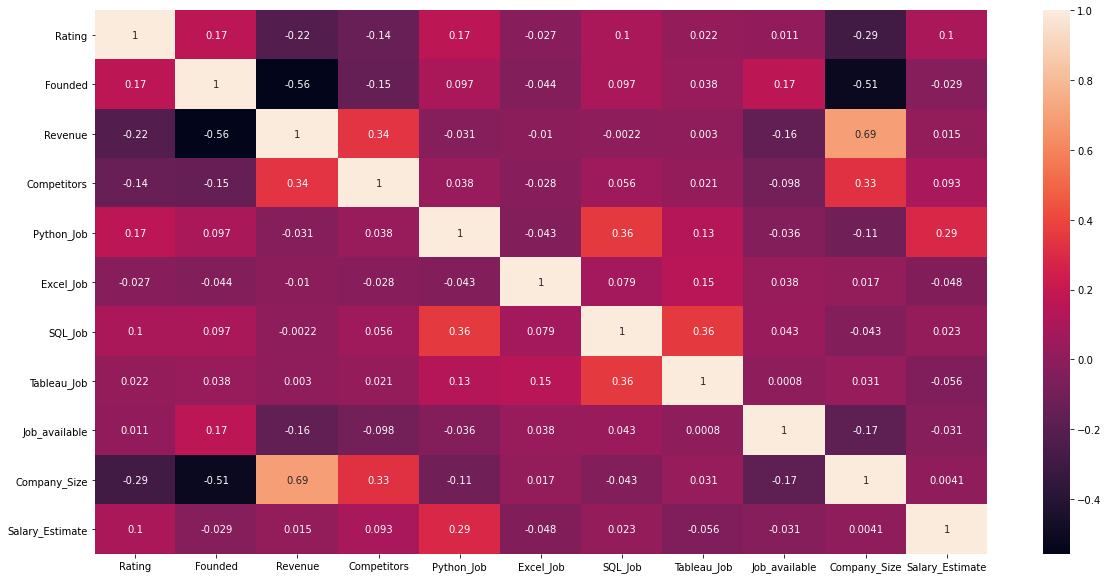

In [163]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(), annot=True)

In [164]:
colname = []

for x in df.columns:
    if df[x].dtypes != "object":
        colname.append(x)

for x in colname:
    print("Column name: ", x)
    print("Skewness Value: ", df[x].skew())
    print("Kurtosis Value: ", df[x].kurtosis())
    print("*" * 75)

Column name:  Rating
Skewness Value:  -0.23320882268203572
Kurtosis Value:  0.08017328105454302
***************************************************************************
Column name:  Founded
Skewness Value:  -2.11875479174209
Kurtosis Value:  4.327825975363867
***************************************************************************
Column name:  Revenue
Skewness Value:  0.07494793540574446
Kurtosis Value:  -1.419130271683545
***************************************************************************
Column name:  Competitors
Skewness Value:  0.8256657028569133
Kurtosis Value:  -1.2331374552936074
***************************************************************************
Column name:  Python_Job
Skewness Value:  -0.07548575512796074
Kurtosis Value:  -1.9984872268191993
***************************************************************************
Column name:  Excel_Job
Skewness Value:  -0.033530125293772264
Kurtosis Value:  -2.0030706455072522
**************************************

# Label Encoding 

In [165]:
colname_cat = []

for x in df.columns:
    if df[x].dtypes == "object":
        colname_cat.append(x)

for feature in colname_cat:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].value_counts())))

The feature is Job_title and number of categories are 7
The feature is Company_Name and number of categories are 448
The feature is Type_of_ownership and number of categories are 8
The feature is Industry and number of categories are 63
The feature is Sector and number of categories are 10


In [166]:
df.drop(["Company_Name", "Industry"], axis = 1, inplace = True)
df.shape

(956, 14)

In [167]:
colname_cat = []

for x in df.columns:
    if df[x].dtypes == "object":
        colname_cat.append(x)

for feature in colname_cat:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].value_counts())))

The feature is Job_title and number of categories are 7
The feature is Type_of_ownership and number of categories are 8
The feature is Sector and number of categories are 10


In [168]:
for feature in colname_cat:
    print('The feature is {} and number of categories are \n{}\n\n'.format(feature,df[feature].value_counts()))

The feature is Job_title and number of categories are 
Data Scientist      560
Data Engineer       158
Data Analyst        105
Other                72
Manager              35
Director             13
Machine Learning     13
Name: Job_title, dtype: int64


The feature is Type_of_ownership and number of categories are 
Private                           533
Public                            237
Nonprofit Organization             65
Subsidiary or Business Segment     40
Other                              34
Government                         17
College / University               15
Hospital                           15
Name: Type_of_ownership, dtype: int64


The feature is Sector and number of categories are 
Information Technology       239
Others                       159
Biotech & Pharmaceuticals    148
Business Services            134
Insurance                     71
Finance                       56
Health Care                   51
Manufacturing                 40
Aerospace & Defense   

In [169]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
for x in colname_cat:
    df[x] = le.fit_transform(df[x])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print('Feature', x)
    print('mapping', le_name_mapping)

Feature Job_title
mapping {'Data Analyst': 0, 'Data Engineer': 1, 'Data Scientist': 2, 'Director': 3, 'Machine Learning': 4, 'Manager': 5, 'Other': 6}
Feature Type_of_ownership
mapping {'College / University': 0, 'Government': 1, 'Hospital': 2, 'Nonprofit Organization': 3, 'Other': 4, 'Private': 5, 'Public': 6, 'Subsidiary or Business Segment': 7}
Feature Sector
mapping {'Aerospace & Defense': 0, 'Biotech & Pharmaceuticals': 1, 'Business Services': 2, 'Education': 3, 'Finance': 4, 'Health Care': 5, 'Information Technology': 6, 'Insurance': 7, 'Manufacturing': 8, 'Others': 9}


In [170]:
df.dtypes

Job_title              int32
Rating               float64
Founded              float64
Type_of_ownership      int32
Sector                 int32
Revenue                int64
Competitors            int64
Python_Job             int64
Excel_Job              int64
SQL_Job                int64
Tableau_Job            int64
Job_available          int64
Company_Size           int64
Salary_Estimate      float64
dtype: object

In [171]:
df.head()

,Job_title,Rating,Founded,Type_of_ownership,Sector,Revenue,Competitors,Python_Job,Excel_Job,SQL_Job,Tableau_Job,Job_available,Company_Size,Salary_Estimate
0,2,3.8,1973.0,5,0,6,0,1,1,0,1,0,4,72.0
1,2,3.4,1984.0,4,5,10,0,1,0,0,0,1,7,87.5
2,2,4.8,2010.0,5,2,7,0,1,1,1,0,1,4,85.0
3,2,3.8,1965.0,1,9,8,3,1,0,0,0,1,5,76.5
4,2,2.9,1998.0,5,2,0,3,1,1,1,0,1,2,114.5


In [172]:
df_new = pd.DataFrame.copy(df)
df_new.head()

,Job_title,Rating,Founded,Type_of_ownership,Sector,Revenue,Competitors,Python_Job,Excel_Job,SQL_Job,Tableau_Job,Job_available,Company_Size,Salary_Estimate
0,2,3.8,1973.0,5,0,6,0,1,1,0,1,0,4,72.0
1,2,3.4,1984.0,4,5,10,0,1,0,0,0,1,7,87.5
2,2,4.8,2010.0,5,2,7,0,1,1,1,0,1,4,85.0
3,2,3.8,1965.0,1,9,8,3,1,0,0,0,1,5,76.5
4,2,2.9,1998.0,5,2,0,3,1,1,1,0,1,2,114.5


In [173]:
Y = df['Salary_Estimate']
Y

0       72.0
1       87.5
2       85.0
3       76.5
4      114.5
       ...  
951    102.5
952     73.5
953    127.5
954     97.5
955     93.5
Name: Salary_Estimate, Length: 956, dtype: float64

In [174]:
X = df.drop('Salary_Estimate', axis = 1)
X.head()

,Job_title,Rating,Founded,Type_of_ownership,Sector,Revenue,Competitors,Python_Job,Excel_Job,SQL_Job,Tableau_Job,Job_available,Company_Size
0,2,3.8,1973.0,5,0,6,0,1,1,0,1,0,4
1,2,3.4,1984.0,4,5,10,0,1,0,0,0,1,7
2,2,4.8,2010.0,5,2,7,0,1,1,1,0,1,4
3,2,3.8,1965.0,1,9,8,3,1,0,0,0,1,5
4,2,2.9,1998.0,5,2,0,3,1,1,1,0,1,2


Selecting features based on information gain (mutual_info_regression) and correlation matrix_

In [175]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

top_var = SelectKBest(score_func = mutual_info_regression, k='all')
top_var.fit(X, Y)

SelectKBest(k='all',
            score_func=<function mutual_info_regression at 0x000001DA02F24EE0>)

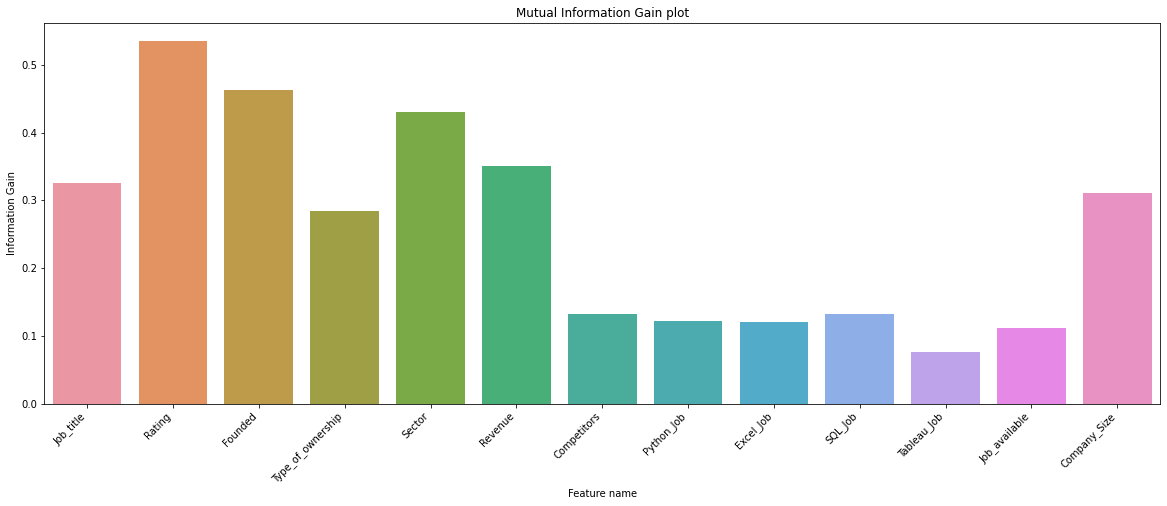

In [176]:
plt.figure(figsize=(20, 7))
g = sns.barplot(x = X.columns, y = top_var.scores_)
p = plt.title('Mutual Information Gain plot')
p = plt.xlabel('Feature name')
p = plt.ylabel('Information Gain')
p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

In [177]:
df.columns

Index(['Job_title', 'Rating', 'Founded', 'Type_of_ownership', 'Sector',
       'Revenue', 'Competitors', 'Python_Job', 'Excel_Job', 'SQL_Job',
       'Tableau_Job', 'Job_available', 'Company_Size', 'Salary_Estimate'],
      dtype='object')

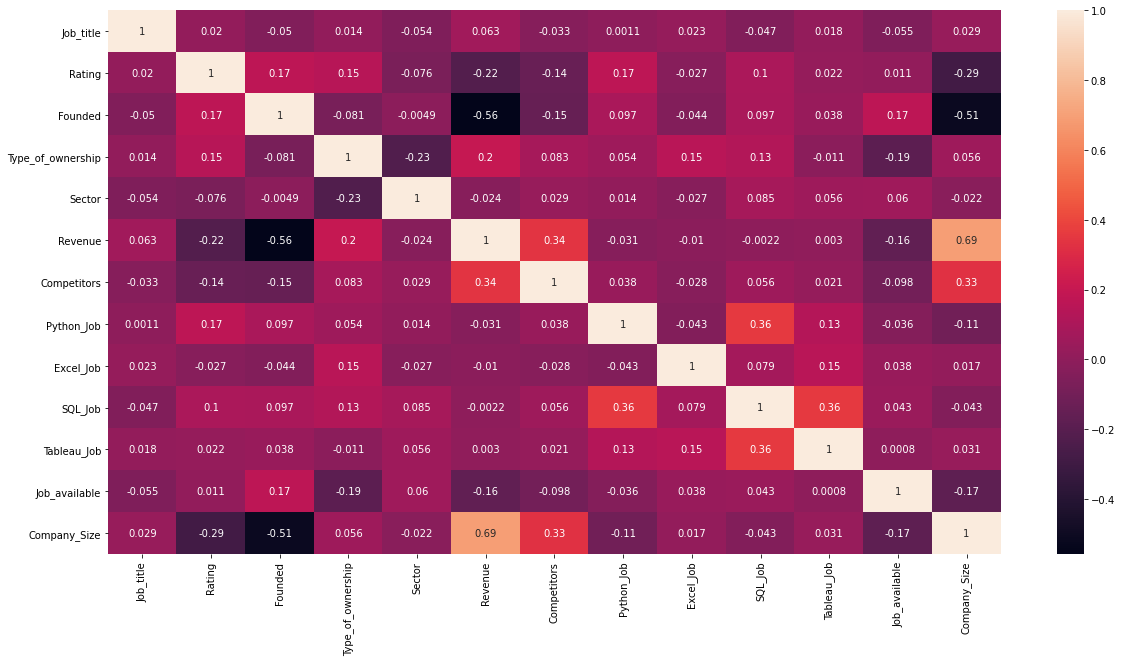

In [178]:
plt.figure(figsize = (20,10))
sns.heatmap(X.corr(), annot=True)

Strong correlation: X > 0.7, Moderate correlation: 0.5 < X < 0.7, Weak correlation: X < 0.5 we can confirm that (Revenue, Founded), (Founded, Company_Size) and (Revenue, Company_Size) are moderately Correlated and hence we will remove revenue and Company_size and perform Model building

In [179]:
X_1 = pd.DataFrame.copy(X)
X_1.head()

,Job_title,Rating,Founded,Type_of_ownership,Sector,Revenue,Competitors,Python_Job,Excel_Job,SQL_Job,Tableau_Job,Job_available,Company_Size
0,2,3.8,1973.0,5,0,6,0,1,1,0,1,0,4
1,2,3.4,1984.0,4,5,10,0,1,0,0,0,1,7
2,2,4.8,2010.0,5,2,7,0,1,1,1,0,1,4
3,2,3.8,1965.0,1,9,8,3,1,0,0,0,1,5
4,2,2.9,1998.0,5,2,0,3,1,1,1,0,1,2


In [180]:
X.drop(["Revenue", "Company_Size"], axis = 1, inplace = True)
X.head()

,Job_title,Rating,Founded,Type_of_ownership,Sector,Competitors,Python_Job,Excel_Job,SQL_Job,Tableau_Job,Job_available
0,2,3.8,1973.0,5,0,0,1,1,0,1,0
1,2,3.4,1984.0,4,5,0,1,0,0,0,1
2,2,4.8,2010.0,5,2,0,1,1,1,0,1
3,2,3.8,1965.0,1,9,3,1,0,0,0,1
4,2,2.9,1998.0,5,2,3,1,1,1,0,1


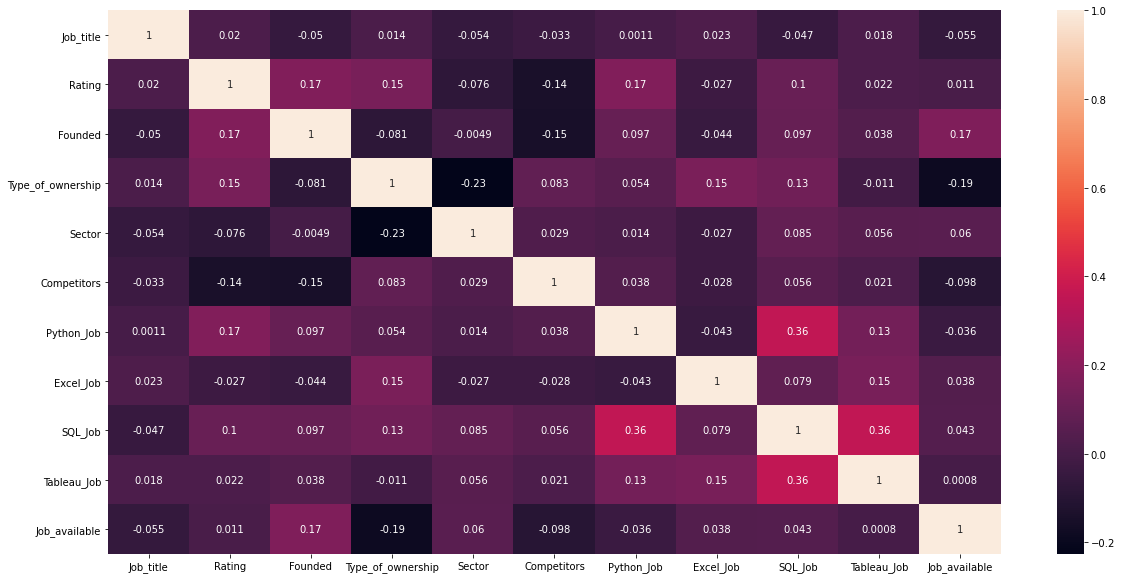

In [181]:
plt.figure(figsize = (20,10))
sns.heatmap(X.corr(), annot=True)

To Plot Upper or lower end Correlation Matrix

In [182]:
"""
# Finding and plotting the correlation matrix for top 18 features

cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.figure(figsize=(15, 15))
corr = X.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

g = sns.heatmap(corr, annot=True, mask=mask, vmax=0.3, center=0, cmap=cmap, square=True, linewidths=0.05)
p = plt.title('Correlation matrix after removing highly correlated features')
"""

"\n# Finding and plotting the correlation matrix for top 18 features\n\ncmap = sns.diverging_palette(220, 10, as_cmap=True)\nplt.figure(figsize=(15, 15))\ncorr = X.corr()\n\n# Generate a mask for the upper triangle\nmask = np.triu(np.ones_like(corr, dtype=np.bool))\n\ng = sns.heatmap(corr, annot=True, mask=mask, vmax=0.3, center=0, cmap=cmap, square=True, linewidths=0.05)\np = plt.title('Correlation matrix after removing highly correlated features')\n"

In [183]:
X.head()

,Job_title,Rating,Founded,Type_of_ownership,Sector,Competitors,Python_Job,Excel_Job,SQL_Job,Tableau_Job,Job_available
0,2,3.8,1973.0,5,0,0,1,1,0,1,0
1,2,3.4,1984.0,4,5,0,1,0,0,0,1
2,2,4.8,2010.0,5,2,0,1,1,1,0,1
3,2,3.8,1965.0,1,9,3,1,0,0,0,1
4,2,2.9,1998.0,5,2,3,1,1,1,0,1


In [184]:
X.shape

(956, 11)

In [185]:
X_2 = pd.DataFrame.copy(X)

In [186]:
X_sc = X[['Rating', "Founded"]]
X_sc

,Rating,Founded
0,3.8,1973.0
1,3.4,1984.0
2,4.8,2010.0
3,3.8,1965.0
4,2.9,1998.0
...,...,...
951,4.4,2006.0
952,2.6,1984.0
953,3.2,1996.0
954,4.8,2015.0


In [187]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_sc)
X_sc = scaler.transform(X_sc)
X_sc

array([[ 0.04685821, -0.08672796],
       [-0.62174552,  0.13879906],
       [ 1.71836754,  0.67186292],
       ...,
       [-0.95604739,  0.38482853],
       [ 1.71836754,  0.7743752 ],
       [-0.28744365, -0.2097427 ]])

In [188]:
X_sc = pd.DataFrame(X_sc, columns = [['Rating', "Founded"]])
X_sc.head()

,Rating,Founded
0,0.046858,-0.086728
1,-0.621746,0.138799
2,1.718368,0.671863
3,0.046858,-0.250748
4,-1.457500,0.425833


In [189]:
X['Rating'] = X_sc['Rating']
X['Founded'] = X_sc['Founded']

In [190]:
X.head()

,Job_title,Rating,Founded,Type_of_ownership,Sector,Competitors,Python_Job,Excel_Job,SQL_Job,Tableau_Job,Job_available
0,2,0.046858,-0.086728,5,0,0,1,1,0,1,0
1,2,-0.621746,0.138799,4,5,0,1,0,0,0,1
2,2,1.718368,0.671863,5,2,0,1,1,1,0,1
3,2,0.046858,-0.250748,1,9,3,1,0,0,0,1
4,2,-1.457500,0.425833,5,2,3,1,1,1,0,1


Text(0.5, 1.0, 'After Standard Scaling')

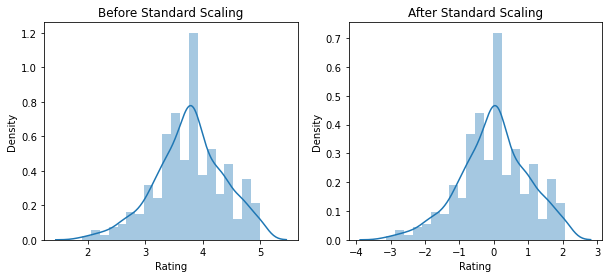

In [191]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.distplot(X_2['Rating'])
plt.title("Before Standard Scaling")

plt.subplot(1, 2, 2)
sns.distplot(X['Rating'])
plt.title("After Standard Scaling")

Text(0.5, 1.0, 'After Standard Scaling')

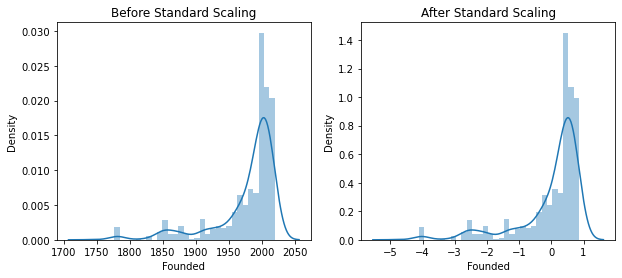

In [192]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.distplot(X_2['Founded'])
plt.title("Before Standard Scaling")

plt.subplot(1, 2, 2)
sns.distplot(X['Founded'])
plt.title("After Standard Scaling")

In [196]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,
                                                    random_state=10)  
print("The number of rows in X_train data is: {} \nThe Number of column in X_train data is: {}".format(X_train.shape[0], X_train.shape[1]))
print()
print("*" * 50)
print("The number of rows in X_test data is: {} \nThe Number of column in X_test data is: {}".format(X_test.shape[0], X_test.shape[1]))
print()
print("*" * 50)
print("The number of rows in Y_train data is: {}".format(Y_train.shape[0]))
print()
print("*" * 50)
print("The number of rows in Y_test data is: {} ".format(Y_test.shape[0]))

The number of rows in X_train data is: 669 
The Number of column in X_train data is: 11

**************************************************
The number of rows in X_test data is: 287 
The Number of column in X_test data is: 11

**************************************************
The number of rows in Y_train data is: 669

**************************************************
The number of rows in Y_test data is: 287 


# Linear Regression

In [ ]:
"""
# Packages for Model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import metrics
from sklearn.linear_model import (Ridge, Lasso)
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import linear_model, tree, ensemble
from xgboost import XGBRegressor"""

In [197]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import metrics

lm = LinearRegression()
lm.fit(X_train,Y_train)

print(lm.intercept_)
print(lm.coef_)

62.81528632253753
[ 2.04840057  0.76544305  0.12722079  5.35105922 -0.71220449  2.0748313
 22.77813997 -2.90131684 -7.512515   -4.49946099  3.80699656]


In [199]:
print(list(zip(X.columns, lm.coef_)))

[('Job_title', 2.0484005706922743), ('Rating', 0.7654430490411999), ('Founded', 0.12722078979805235), ('Type_of_ownership', 5.351059221792041), ('Sector', -0.712204485333449), ('Competitors', 2.074831304768948), ('Python_Job', 22.77813996564609), ('Excel_Job', -2.90131684447526), ('SQL_Job', -7.512515003885538), ('Tableau_Job', -4.499460986584965), ('Job_available', 3.80699655936474)]


In [200]:
Y_pred = lm.predict(X_test)
Y_pred

array([ 98.26963778,  91.14800781, 109.3610042 , 115.72504411,
       122.60100135,  95.18356094,  71.67671755, 106.65462266,
        82.8788762 , 119.61301266, 114.83339432, 116.23379661,
        99.13918728,  90.19156245,  63.99733148,  95.49109648,
        86.92662851, 111.82033086,  76.00930747,  97.08882192,
        77.35223302,  86.84335255,  85.811972  ,  94.28414094,
       112.66384623, 109.6228618 ,  85.81924735, 111.02594709,
       107.30453459,  87.84310686,  86.84335255, 108.74648351,
       107.3211457 , 111.02594709,  89.8561566 , 125.10620158,
        85.83645786, 115.87360717, 109.54633064,  76.7134165 ,
       108.56408458, 102.61319397,  87.74903227, 119.66355844,
        94.41938414,  63.99733148,  86.93682399, 108.74648351,
       134.08120737,  86.32175852, 105.71826556,  93.66980386,
       110.03465294,  83.359915  ,  86.03774709,  77.88661618,
       110.88218579, 104.67934368, 107.13903246, 109.17231777,
       115.24395265, 113.14804731,  84.4946688 ,  99.70

In [201]:
r2=r2_score(Y_test,Y_pred)
print(r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print(rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

0.13867954771872182
31.692687185006076
0.1286429746518849


In [258]:
MAE = metrics.mean_absolute_error(Y_test, Y_pred)
print('MAE:', MAE)

MSE = metrics.mean_squared_error(Y_test, Y_pred)
print("MSE:", MSE)

rmse = mean_squared_error(Y_test, Y_pred, squared=False)

MAE: 24.25924900964509
MSE: 1004.4264210066484


# Polynomial Regression  

In [204]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
X_train_poly, X_test_poly, Y_train_poly, Y_test_poly = train_test_split(X_poly, Y,
                                                   test_size=0.3, random_state=10)
print("The number of rows in X_train_poly data is: {} \nThe Number of column in X_train data is: {}".format(X_train_poly.shape[0], X_train_poly.shape[1]))
print()
print("*" * 50)
print("The number of rows in X_test_poly data is: {} \nThe Number of column in X_test data is: {}".format(X_test_poly.shape[0], X_test_poly.shape[1]))
print()
print("*" * 50)
print("The number of rows in Y_train_poly data is: {}".format(Y_train_poly.shape[0]))
print()
print("*" * 50)
print("The number of rows in Y_test_poly data is: {} ".format(Y_test_poly.shape[0]))

The number of rows in X_train_poly data is: 669 
The Number of column in X_train data is: 78

**************************************************
The number of rows in X_test_poly data is: 287 
The Number of column in X_test data is: 78

**************************************************
The number of rows in Y_train_poly data is: 669

**************************************************
The number of rows in Y_test_poly data is: 287 


In [205]:
#Then we use the built-in LinearRegression() with the polynomial features to build a polynomial regression model.
polyreg = LinearRegression().fit(X_train_poly, Y_train_poly)

polyreg_train_score = polyreg.score(X_train_poly, Y_train_poly)
polyreg_valid_score = polyreg.score(X_test_poly, Y_test_poly)

print('R-squared score (training): {:.3f}'
     .format(polyreg_train_score))
print('R-squared score (validation): {:.3f}'
     .format(polyreg_valid_score))

R-squared score (training): 0.378
R-squared score (validation): 0.197


In [206]:
Y_pred_poly = polyreg.predict(X_test_poly)
Y_pred_poly

array([ 89.95921619, 101.47399525, 122.76838305,  81.45847066,
       146.36461596,  78.28980868,  76.47930617, 111.61580412,
        67.15032156, 106.10779565,  74.30313425, 128.64230844,
       110.3339557 ,  33.69074051,  85.16131832,  88.81491556,
        85.20765377, 106.12602489,  66.16816144, 107.22309936,
        84.01481327,  81.18376671,  92.241614  , 116.1609582 ,
       119.03942492, 115.10875082,  48.83326291, 116.32718291,
        76.55285868,  94.29752455,  81.18376671, 124.04967313,
        59.10182368, 116.32718291,  99.62362781, 128.03937153,
       100.68379648, 106.14404648, 142.47073463,  66.1883771 ,
        87.80212034,  99.89481256,  80.20178303, 120.24771239,
       102.76875316,  85.16131832,  98.1885107 , 124.04967313,
       124.59220083, 112.7154628 ,  64.84053447, 108.28281549,
       123.79459605,  63.94845243, 105.36297637, 103.5968141 ,
       112.26999858, 102.46049735, 118.94346212, 100.86426371,
       127.88566124, 110.01453734,  77.48372388,  97.46

In [207]:
r2_poly = r2_score(Y_test_poly,Y_pred_poly)
print(r2)

rmse_poly = np.sqrt(mean_squared_error(Y_test_poly, Y_pred_poly))
print(rmse_poly)

adjusted_r_squared_poly = 1 - (1-r2_poly)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared_poly)

0.13867954771872182
30.603150775967954
0.18752446428598257


In [208]:
MAE_poly = metrics.mean_absolute_error(Y_test_poly, Y_pred_poly)
print('MAE:', MAE_poly)

MSE_poly = metrics.mean_squared_error(Y_test_poly, Y_pred_poly)
print("MSE: ", MSE_poly)

rmse_poly = mean_squared_error(Y_test_poly, Y_pred_poly, squared=False)
print("RMSE:", rmse_poly)

MAE: 23.19302293192968
MSE:  936.552837416628
RMSE: 30.603150775967954


# Linear Regression + Cross-Validation

In [214]:
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
lm_cv = LinearRegression()
cv = cross_val_score(lm_cv, X, Y, cv = 15, scoring = 'neg_root_mean_squared_error')

Linear_cv_RMSE = (round(cv.mean(), 3))
Linear_cv_STD = (round(cv.std(), 3))                
print('Linear Cross-Validation RMSE: {}'.format(round(cv.mean(), 3)))
print('Linear Cross-Validation Std: {}'.format(round(cv.std(), 3)))

Linear Cross-Validation RMSE: -31.585
Linear Cross-Validation Std: 2.665


# Lasso Regularization on Train data

In [215]:
from sklearn.linear_model import (Ridge, Lasso)
lasso = Lasso(normalize = True)

# Fit the regressor to the data
lasso.fit(X_train, Y_train)

# Compute and print the coefficients
print(lasso.intercept_)
print()
print(lasso.coef_)

100.29521674140508

[ 0.  0.  0.  0. -0.  0.  0. -0.  0. -0.  0.]


In [217]:
Y_pred_lasso = lasso.predict(X_test)
Y_pred_lasso

array([100.29521674, 100.29521674, 100.29521674, 100.29521674,
       100.29521674, 100.29521674, 100.29521674, 100.29521674,
       100.29521674, 100.29521674, 100.29521674, 100.29521674,
       100.29521674, 100.29521674, 100.29521674, 100.29521674,
       100.29521674, 100.29521674, 100.29521674, 100.29521674,
       100.29521674, 100.29521674, 100.29521674, 100.29521674,
       100.29521674, 100.29521674, 100.29521674, 100.29521674,
       100.29521674, 100.29521674, 100.29521674, 100.29521674,
       100.29521674, 100.29521674, 100.29521674, 100.29521674,
       100.29521674, 100.29521674, 100.29521674, 100.29521674,
       100.29521674, 100.29521674, 100.29521674, 100.29521674,
       100.29521674, 100.29521674, 100.29521674, 100.29521674,
       100.29521674, 100.29521674, 100.29521674, 100.29521674,
       100.29521674, 100.29521674, 100.29521674, 100.29521674,
       100.29521674, 100.29521674, 100.29521674, 100.29521674,
       100.29521674, 100.29521674, 100.29521674, 100.29

In [218]:
r2_lasso = r2_score(Y_test,Y_pred_lasso)
print(r2_lasso)

rmse_lasso = np.sqrt(mean_squared_error(Y_test,Y_pred_lasso))
print(rmse_lasso)

adjusted_r_squared_lasso = 1 - (1-r2_lasso)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared_lasso)

-0.0012952713268503668
34.17100616369621
-0.012962906903752236


In [220]:
MAE_lasso = metrics.mean_absolute_error(Y_test, Y_pred_lasso)
print('MAE_lasso:', MAE_lasso)

MSE_lasso = mean_squared_error(Y_test, Y_pred_lasso)
print("MSE_lasso:", MSE_lasso)

RMSE_Lasso = mean_squared_error(Y_test, Y_pred_lasso, squared=False)
print("RMSE:", RMSE_Lasso)

MAE_lasso: 23.806463961500604
MSE_lasso: 1167.6576622393643
RMSE: 34.17100616369621


In [221]:
lasso = Lasso(alpha = 0.2, normalize = True)

# Fit the regressor to the data
lasso.fit(X_train, Y_train)

# Compute and print the coefficients
print(lasso.intercept_)
print()
print(lasso.coef_)

88.53405247906699

[ 0.          0.         -0.          1.30539853 -0.          0.
 10.18529044 -0.         -0.         -0.          0.        ]


In [222]:
Y_pred_lasso = lasso.predict(X_test)
Y_pred_lasso

array([105.24633555,  95.06104511, 105.24633555, 106.55173408,
       105.24633555,  95.06104511,  92.45024806, 105.24633555,
        95.06104511, 105.24633555, 105.24633555, 105.24633555,
        96.36644364,  92.45024806,  92.45024806,  95.06104511,
        95.06104511, 103.94093703,  92.45024806,  96.36644364,
        91.14484953,  95.06104511,  96.36644364,  96.36644364,
        97.67184216, 105.24633555,  95.06104511, 105.24633555,
       105.24633555,  95.06104511,  95.06104511, 106.55173408,
       105.24633555, 105.24633555, 103.94093703, 106.55173408,
        95.06104511, 105.24633555, 107.85713261,  95.06104511,
       105.24633555,  96.36644364,  95.06104511, 106.55173408,
        96.36644364,  92.45024806,  92.45024806, 106.55173408,
       106.55173408,  95.06104511, 105.24633555, 102.6355385 ,
       105.24633555,  96.36644364,  95.06104511,  95.06104511,
       103.94093703, 105.24633555, 106.55173408, 106.55173408,
       105.24633555, 105.24633555,  95.06104511, 105.24

In [223]:
r2_lasso = r2_score(Y_test,Y_pred_lasso)
print(r2_lasso)

rmse_lasso = np.sqrt(mean_squared_error(Y_test,Y_pred_lasso))
print(rmse_lasso)

adjusted_r_squared_lasso = 1 - (1-r2_lasso)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared_lasso)

0.0752322951369957
32.83923348702347
0.0644564002710073


In [224]:
MAE_lasso = metrics.mean_absolute_error(Y_test, Y_pred_lasso)
print('MAE_lasso:', MAE_lasso)

MSE_lasso = mean_squared_error(Y_test, Y_pred_lasso)
print("MSE_lasso:", MSE_lasso)

RMSE_Lasso = mean_squared_error(Y_test, Y_pred_lasso, squared=False)
print("RMSE:", RMSE_Lasso)

MAE_lasso: 23.44676585133398
MSE_lasso: 1078.4152560152436
RMSE: 32.83923348702347


# Lasso + Cross-Validation

In [229]:
lasso_cv = Lasso()
cv_1 = cross_val_score(lasso_cv, X, Y, cv = 15, scoring='neg_root_mean_squared_error')

Lasso_cv_RMSE = (round(cv_1.mean(), 3))
Lasso_cv_STD = (round(cv_1.std(), 3))                
print('Lasso Cross-Validation RMSE: {}'.format(round(cv_1.mean(), 3)))
print('Lasso Cross-Validation Std: {}'.format(round(cv_1.std(), 3)))

Lasso Cross-Validation RMSE: -31.867
Lasso Cross-Validation Std: 2.933


# Ridge Regularization

In [230]:
ridge = Ridge(normalize=True)
# Fit the regressor to the data
ridge.fit(X_train,Y_train)

# Compute and print the coefficients
print(ridge.intercept_)
print()
print(ridge.coef_)

82.72805998125783

[ 0.96985876  1.06208671  0.0265127   2.58785192 -0.48376698  1.06232193
 10.32549262 -1.53649631 -1.23847747 -2.65083329  0.911286  ]


In [231]:
Y_pred_ridge = ridge.predict(X_test)
Y_pred_ridge

array([100.07512138,  98.26186453, 105.83657662, 108.38331497,
       109.54551224,  96.13112851,  87.15924874, 103.97526891,
        92.69992657, 109.19379731, 108.23868912, 106.18741017,
       101.3196013 ,  94.11797303,  83.3631361 ,  97.71111609,
        93.08606238, 103.3351113 ,  87.25244686,  98.40933983,
        87.51804322,  92.48839746,  94.34577784,  99.47750014,
       104.8681342 , 104.39949301,  91.84035708, 105.19554006,
       106.82289537,  94.33311248,  92.48839746, 105.21929888,
       106.20518141, 105.19554006,  95.62493827, 110.76684627,
        94.94290224, 108.09013879, 105.41364948,  90.6957569 ,
       105.25700766, 101.22148761,  91.86318715, 109.64301019,
        97.59124718,  83.3631361 ,  91.60379674, 105.21929888,
       115.88822672,  95.15493928, 105.00445869,  96.04950956,
       104.44919942,  90.24210198,  92.93091183,  92.19230303,
       103.18046119, 104.5689954 , 106.32985858, 105.19165107,
       105.33458306, 107.52001015,  91.68099335, 100.86

In [232]:
r2_ridge = r2_score(Y_test,Y_pred_ridge)
print(r2_ridge)

rmse_ridge = np.sqrt(mean_squared_error(Y_test,Y_pred_ridge))
print(rmse_ridge)

adjusted_r_squared_ridge = 1 - (1-r2_ridge)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared_ridge)

0.11253365679275906
32.170116227878694
0.10219241762403064


In [233]:
MAE_ridge = metrics.mean_absolute_error(Y_test, Y_pred_ridge)
print('MAE_ridge:', MAE_ridge)
MSE_ridge = mean_squared_error(Y_test, Y_pred_ridge)
print("MSE_ridge:", MSE_ridge)
RMSE_Ridge = mean_squared_error(Y_test, Y_pred_ridge, squared=False)
print("RMSE:", RMSE_Ridge)

MAE_ridge: 23.41759262145434
MSE_ridge: 1034.916378115224
RMSE: 32.170116227878694


In [234]:
ridge = Ridge(alpha = 0.2, normalize=True)
# Fit the regressor to the data
ridge.fit(X_train,Y_train)

# Compute and print the coefficients
print(ridge.intercept_)
print()
print(ridge.coef_)

70.22229996731798

[ 1.66987109  1.03740259  0.07416618  4.33112475 -0.67006039  1.75072196
 18.13865246 -2.45583573 -4.62146861 -4.20225519  2.5709127 ]


In [235]:
Y_pred_ridge = ridge.predict(X_test)
Y_pred_ridge

array([ 98.88655502,  94.39419043, 108.4272985 , 113.3292978 ,
       117.6317327 ,  95.16179451,  77.52228483, 105.87976923,
        86.67943007, 115.82701699, 112.69996174, 112.18175305,
       100.40097091,  91.43547599,  70.91711832,  96.23350894,
        88.91553508, 108.19649244,  79.74084211,  97.24732859,
        80.68241104,  88.53652396,  89.15285433,  96.712898  ,
       109.57378979, 107.75350383,  87.37277127, 108.81254507,
       107.93807965,  90.14151947,  88.53652396, 107.68610436,
       107.6159979 , 108.81254507,  91.79224267, 119.60084075,
        89.33225905, 113.13376653, 107.92519834,  81.94732756,
       107.44075091, 102.06525054,  88.65160092, 115.96529324,
        95.57021208,  70.91711832,  88.20003727, 107.68610436,
       127.45963489,  89.93879924, 106.0025322 ,  94.18599726,
       107.84709527,  85.04651951,  88.34781235,  83.49227454,
       107.61109814, 105.18287103, 107.26072216, 107.89348751,
       111.16800977, 111.48634366,  86.79055706, 100.32

In [236]:
r2_ridge = r2_score(Y_test,Y_pred_ridge)
print(r2_ridge)

rmse_ridge = np.sqrt(mean_squared_error(Y_test,Y_pred_ridge))
print(rmse_ridge)

adjusted_r_squared_ridge = 1 - (1-r2_ridge)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared_ridge)

0.14080414925754614
31.6535751993739
0.13079233320016592


In [237]:
MAE_ridge = metrics.mean_absolute_error(Y_test, Y_pred_ridge)
print('MAE_ridge:', MAE_ridge)
MSE_ridge = mean_squared_error(Y_test, Y_pred_ridge)
print("MSE_ridge:", MSE_ridge)
RMSE_Ridge = mean_squared_error(Y_test, Y_pred_ridge, squared=False)
print("RMSE:", RMSE_Ridge)

MAE_ridge: 23.81896203608763
MSE_ridge: 1001.9488229024186
RMSE: 31.6535751993739


# RIDGE + Cross-Validation

In [238]:
ridge_cv = Lasso()
cv_2 = cross_val_score(ridge_cv, X, Y, cv = 15, scoring='neg_root_mean_squared_error')

Ridge_cv_RMSE = (round(cv_2.mean(), 3))
Ridge_cv_STD = (round(cv_2.std(), 3))                
print('Ridge Cross-Validation RMSE: {}'.format(round(cv_2.mean(), 3)))
print('Ridge Cross-Validation Std: {}'.format(round(cv_2.std(), 3)))

Ridge Cross-Validation RMSE: -31.867
Ridge Cross-Validation Std: 2.933


# Multiple Model

In [239]:
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import linear_model, tree, ensemble

kf =KFold(n_splits=5, shuffle=True, random_state=42)

cnt = 1
# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(X_train, Y_train):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt += 1

Fold:1, Train set: 535, Test set:134
Fold:2, Train set: 535, Test set:134
Fold:3, Train set: 535, Test set:134
Fold:4, Train set: 535, Test set:134
Fold:5, Train set: 536, Test set:133


In [240]:
score = cross_val_score(linear_model.LinearRegression(), X_train, Y_train, cv= kf, scoring="neg_mean_squared_error")
print(f'Scores for each fold: {score}')

Scores for each fold: [-1223.37516181  -879.03634208 -1181.46217689 -1062.60557018
  -755.66478104]


In [241]:
score.mean()

-1020.4288064010243

In [242]:
def rmse(score):
    rmse = np.sqrt(-score)
    print(f'rmse= {"{:.2f}".format(rmse)}')
rmse(score.mean())

rmse= 31.94


In [243]:
score_cv = cross_val_score(linear_model.LinearRegression(), X_train, Y_train, cv= kf, scoring="neg_mean_squared_error")
print(f'Scores for each fold: {score_cv}')
rmse_cv = rmse(score_cv.mean())
print(rmse_cv)

Scores for each fold: [-1223.37516181  -879.03634208 -1181.46217689 -1062.60557018
  -755.66478104]
rmse= 31.94
None


# Random Forest

In [244]:
from sklearn.ensemble import RandomForestRegressor

rf_cv = RandomForestRegressor()
cv_3 = cross_val_score(rf_cv, X, Y, cv = 15, scoring='neg_root_mean_squared_error')

RF_cv_RMSE = (round(cv_3.mean(), 3))
RF_cv_STD = (round(cv_3.std(), 3))                
print('Ridge Cross-Validation RMSE: {}'.format(round(cv_3.mean(), 3)))
print('Ridge Cross-Validation Std: {}'.format(round(cv_3.std(), 3)))

Ridge Cross-Validation RMSE: -19.162
Ridge Cross-Validation Std: 7.494


# XGB Regression

In [245]:
from xgboost import XGBRegressor

#Create a XGBoost Regressor
reg = XGBRegressor(n_estimators=3600, learning_rate=0.05)

# Train the model using the training sets 
reg.fit(X_train, Y_train ,early_stopping_rounds=5,eval_set=[(X_test, Y_test)], verbose=0)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=3600, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [246]:
#Predicting Test data with the model
Y_pred_xgb = reg.predict(X_test)
Y_pred_xgb

array([105.19663 , 117.01269 , 111.34638 ,  63.671852, 153.0724  ,
        67.94051 ,  57.347664, 102.12108 ,  65.1822  , 108.82017 ,
        59.932735, 131.5368  , 101.480515,  75.41775 ,  91.99468 ,
       100.826965,  96.952705,  97.951004,  96.14148 , 106.99643 ,
        81.84386 ,  99.72262 ,  55.97352 ,  98.3381  ,  74.47031 ,
       103.73439 ,  87.929924,  98.98091 , 112.60071 , 101.52921 ,
        99.72262 , 116.23642 ,  57.13314 ,  98.98091 , 102.73726 ,
       103.42038 ,  67.769844,  99.598625, 100.92851 ,  47.78158 ,
        75.72879 , 100.13883 ,  96.69968 , 113.59241 ,  67.11202 ,
        91.99468 ,  89.17361 , 116.23642 ,  88.89717 , 136.81332 ,
        61.81827 ,  82.39316 , 139.72481 ,  19.681347,  99.14155 ,
        92.87029 , 103.5331  ,  98.90862 ,  95.571465, 114.79765 ,
       113.34083 , 180.16739 , 104.35049 , 106.27207 ,  97.77022 ,
       107.16482 ,  85.77418 ,  96.10357 ,  73.6516  ,  97.530655,
        95.87406 , 140.62447 ,  93.021675, 123.77298 ,  89.092

In [247]:
# Model Evaluation
acc_xgb = metrics.r2_score(Y_test, Y_pred_xgb)
print('R^2:', acc_xgb)
adjusted_r_square_xgb = 1 - (1-metrics.r2_score(Y_test, Y_pred_xgb))*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)
print('Adjusted R^2:', adjusted_r_square_xgb)
MAE_xgb = metrics.mean_absolute_error(Y_test, Y_pred_xgb)
print('MAE:', MAE_xgb)
MSE_xgb = metrics.mean_squared_error(Y_test, Y_pred_xgb)
print('MSE:', MSE_xgb)
RMSE_xgb = np.sqrt(metrics.mean_squared_error(Y_test, Y_pred_xgb))
print("RMSE_xgb:", RMSE_xgb)

R^2: 0.6690694182590837
Adjusted R^2: 0.655832194989447
MAE: 13.148353284244338
MSE: 385.91376640285284
RMSE_xgb: 19.644687994540735


# Gradient Boosting + Cross-Validation

In [249]:
from sklearn.ensemble import GradientBoostingRegressor

gb_cv = GradientBoostingRegressor()
cv_4 = cross_val_score(gb_cv, X, Y, cv = 15, scoring='neg_root_mean_squared_error')

gb_cv_RMSE = (round(cv_4.mean(), 3))
gb_cv_STD = (round(cv_4.std(), 3))                
print('Gradient Boosting Cross-Validation RMSE: {}'.format(round(cv_4.mean(), 3)))
print('Gradient Boosting Cross-Validation Std: {}'.format(round(cv_4.std(), 3)))

Gradient Boosting Cross-Validation RMSE: -25.75
Gradient Boosting Cross-Validation Std: 3.304


In [193]:
# Using GridSearchCV to find the best algorithm for this problem
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [194]:
def find_best_model(X, Y):
    models = {
        'linear_regression': {
            'model': LinearRegression(),
            'parameters': {
                'normalize': [True,False]
            }
        },
        
        'lasso': {
            'model': Lasso(),
            'parameters': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        
        'svr': {
            'model': SVR(),
            'parameters': {
                'gamma': ['auto','scale']
            }
        },
        
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'parameters': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        },
        
        'random_forest': {
            'model': RandomForestRegressor(criterion='mse'),
            'parameters': {
                'n_estimators': [5,10,15,20]
            }
        },
        
        'knn': {
            'model': KNeighborsRegressor(algorithm='auto'),
            'parameters': {
                'n_neighbors': [2,5,10,20]
            }
        }
    }
    
    scores = []
    for model_name, model_params in models.items():
        gs = GridSearchCV(model_params['model'], model_params['parameters'], cv=5, return_train_score=False)
        gs.fit(X, Y)
        scores.append({
            'model': model_name,
            'best_parameters': gs.best_params_,
            'score': gs.best_score_
        })
        
    return pd.DataFrame(scores, columns=['model','best_parameters','score'])
        
find_best_model(X, Y)

,model,best_parameters,score
0,linear_regression,{'normalize': True},0.135207
1,lasso,"{'alpha': 1, 'selection': 'random'}",0.123099
2,svr,{'gamma': 'auto'},0.093425
3,decision_tree,"{'criterion': 'friedman_mse', 'splitter': 'ran...",0.375950
4,random_forest,{'n_estimators': 20},0.518072
5,knn,{'n_neighbors': 2},0.317538


# OUTPUT OF VARIOUS ALGORITHM

In [259]:
print("\033[1m" + 'Linear Regression:' + "\033[0m")
print("R^2 for train data: ", r2)
print("Adj-R^2 for train data: ", adjusted_r_squared)
print("MAE for train data: ", MAE)
print("MSE for train data: ", MSE)
print("RMSE for train data: ", rmse)
print("-" * 50,"*" *25, "-"*50)
print()

print("\033[1m" + 'Polynomial Regression:' + "\033[0m")
print("R^2 for train data: ", r2_poly)
print("Adj-R^2 for train data: ", adjusted_r_squared_poly)
print("MAE for train data: ", MAE_poly)
print("MSE for train data: ", MSE_poly)
print("RMSE for train data: ", rmse_poly)
print("-" * 50,"*" *25, "-"*50)
print()

print("\033[1m" + 'Linear Regression + Cross-Validation:' + "\033[0m")
print('Linear Cross-Validation RMSE: {}'.format(round(cv.mean(), 3)))
print('Linear Cross-Validation Std: {}'.format(round(cv.std(), 3)))
print("-" * 50,"*" *25, "-"*50)
print()

print("\033[1m" + 'Lasso Regularization:' + "\033[0m")
print("R^2 for train data: ", r2_lasso)
print("Adj-R^2 for train data: ", adjusted_r_squared_lasso)
print("MAE for train data: ", MAE_lasso)
print("MSE for train data: ", MSE_lasso)
print("RMSE for train data: ", rmse_lasso)
print("-" * 50,"*" *25, "-"*50)
print()

print("\033[1m" + 'Lasso Regularization + Cross-Validation :' + "\033[0m")
print('Lasso Cross-Validation RMSE: {}'.format(round(cv_1.mean(), 3)))
print('Lasso Cross-Validation Std: {}'.format(round(cv_1.std(), 3)))
print("-" * 50,"*" *25, "-"*50)
print()

print("\033[1m" + 'Ridge Regularization:' + "\033[0m")
print("R^2 for train data: ", r2_ridge)
print("Adj-R^2 for train data: ", adjusted_r_squared_ridge)
print("MAE for train data: ", MAE_ridge)
print("MSE for train data: ", MSE_ridge)
print("RMSE for train data: ", rmse_ridge)
print("-" * 50,"*" *25, "-"*50)
print()

print("\033[1m" + 'Ridge Regularization + Cross-Validation :' + "\033[0m")
print('Ridge Cross-Validation RMSE: {}'.format(round(cv_2.mean(), 3)))
print('Ridge Cross-Validation Std: {}'.format(round(cv_2.std(), 3)))
print("-" * 50,"*" *25, "-"*50)
print()

print("\033[1m" + 'Random Forest + Cross-Validation :' + "\033[0m")
print('Ridge Cross-Validation RMSE: {}'.format(round(cv_3.mean(), 3)))
print('Ridge Cross-Validation Std: {}'.format(round(cv_3.std(), 3)))
print("-" * 50,"*" *25, "-"*50)
print()

print("\033[1m" + 'XGB Regression:' + "\033[0m")
print("R^2 for train data: ", acc_xgb)
print("Adj-R^2 for train data: ", adjusted_r_square_xgb)
print("MAE for train data: ", MAE_xgb)
print("MSE for train data: ", MSE_xgb)
print("RMSE for train data: ", RMSE_xgb)
print("-" * 50,"*" *25, "-"*50)
print()

print("\033[1m" + 'Gradient Boosting + Cross-Validation :' + "\033[0m")
print('Ridge Cross-Validation RMSE: {}'.format(round(cv_4.mean(), 3)))
print('Gradient Boosting Cross-Validation Std: {}'.format(round(cv_4.std(), 3)))
print("-" * 50,"*" *25, "-"*50)
print()

print("\033[1m" + 'Multiple Model at Once:' + "\033[0m")
print(find_best_model(X, Y))
print("-" * 50,"*" *25, "-"*50)
print()

Linear Regression:
R^2 for train data:  0.13867954771872182
Adj-R^2 for train data:  0.1286429746518849
MAE for train data:  24.25924900964509
MSE for train data:  1004.4264210066484
RMSE for train data:  31.692687185006076
-------------------------------------------------- ************************* --------------------------------------------------

Polynomial Regression:
R^2 for train data:  0.19688282124185086
Adj-R^2 for train data:  0.18752446428598257
MAE for train data:  23.19302293192968
MSE for train data:  936.552837416628
RMSE for train data:  30.603150775967954
-------------------------------------------------- ************************* --------------------------------------------------

Linear Regression + Cross-Validation:
Linear Cross-Validation RMSE: -31.585
Linear Cross-Validation Std: 2.665
-------------------------------------------------- ************************* --------------------------------------------------

Lasso Regularization:
R^2 for train data:  0.075232

XGB Regression gives the best R^2 and Adjusted R^2 value along with low RMSE value and we will plot our Test Data based on XGB Regression model